# Cubic Zirconia Price Prediction

## Problem Statement:

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Data Description:

The dataset contains the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The details can be found in the following csv file: cubic_zirconia.csv


## Domain:
Manfucturing (Zirconia)

## Context:
The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, we need to provide them with the best 5 attributes that are most important.

## Attribute Information:

- Carat : Carat weight of the cubic zirconia.
- Cut	: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- Color :	 Colour of the cubic zirconia.With D being the best and J the worst.
- Clarity	: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL =  flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth	: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table	: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- Price	: the Price of the cubic zirconia.
- X	 : Length of the cubic zirconia in mm.
- Y	 : Width of the cubic zirconia in mm.
- Z	 : Height of the cubic zirconia in mm.

## Import all the necessary libraries

In [1089]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True) # adds a nice background to the graphs
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

## Read the data into the notebook


In [928]:
df1= pd.read_csv('cubic_zirconia.csv',index_col=0)

In [929]:
# taking backup copy
df1_bkp = df1.copy()

In [930]:
df1.head()

carat        cut color clarity  depth  table     x     y     z  price
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [931]:
df1.tail()

carat        cut color clarity  depth  table     x     y     z  price
26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

## Exploratory Data Analysis 
 ## Checking the data types /information


In [932]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


The data set contains 26967 observations of data and 10 features.  All columns except cut, color and clarity are of numeric in nature.

Since non null count is same in every column variable except depth, hence there is null data in depth column

## Checking the shape (Number of rows and columns)

In [933]:
df1.shape

(26967, 10)

## Checking for duplicates

In [934]:
# Check for duplicate data

dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 34


carat        cut color clarity  depth  table     x     y     z  price
4757    0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
6216    0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.00   2130
8145    0.33      Ideal     G     VS1   62.1   55.0  4.46  4.43  2.76    854
8920    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
9819    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
10474   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
10501   1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
12895   1.21    Premium     D     SI2   62.5   57.0  6.79  6.71  4.22   6505
13548   0.43      Ideal     G     VS1   61.9   55.0  4.84  4.86  3.00    943
13784   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
14390   0.60    Premium     D     SI2   62.0   57.0  5.43  5.35  3.34   1196
14411   1.00  Very Good     D     SI1   63.1   56.0  6.34  6.30  3.99   5645
15799   0.90  Very Good     I     VS2   58.4   62.0  6.29  6.35  3.69   3334
16853   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
17264   1.04    Premium     I     SI2   62.0   57.0  6.53  6.47  4.03   3774
18026   1.51       Good     I     SI1   63.8   57.0  7.21  7.18  4.59   6046
18778   0.32    Premium     H     VS2   60.6   58.0  4.47  4.44  2.70    648
18838   1.01    Premium     H     VS1   61.2   61.0  6.44  6.41  3.93   5294
19732   0.30       Good     J     VS1   63.4   57.0  4.23  4.26  2.69    394
19878   2.01    Premium     I     VS2   60.3   62.0  8.13  8.08  4.89  15939
20302   0.30      Ideal     H     SI1   62.2   57.0  4.26  4.29  2.66    450
20761   1.80      Ideal     H     VS1   62.3   56.0  7.79  7.76  4.84  15105
22323   2.05    Premium     I     SI2   62.0   58.0  8.13  8.08  5.02   9850
22489   2.42    Premium     J     VS2   61.3   59.0  8.61  8.58  5.27  17168
22584   0.33      Ideal     F      IF   61.2   56.0  4.47  4.49  2.74   1240
23459   2.66       Good     H     SI2   63.8   57.0  8.71  8.65  5.54  16239
23565   1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
24352   2.50       Fair     H     SI2   64.9   58.0  8.46  8.43  5.48  13278
24817   1.50       Good     G     SI2   57.5   63.0  7.53  7.49  4.32   6006
25269   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25760   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25942   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26192   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26531   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

only 34 duplicates are present in the data which is around 0.12% of data. Hence we are removing these duplicates entries


## Removing the duplicates

In [935]:
df1.drop_duplicates(inplace=True)

In [936]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]
print (df1.shape)

Number of duplicate rows = 0
(26933, 10)


# Univariate Analysis

In [937]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=df1.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR    


In [938]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

## Checking for summary

In [939]:
df1_summ=pd.DataFrame(df1.describe().round(4))


## Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [940]:
df1_summ.loc["CV"],df1_summ.loc["Skew"],df1_summ.loc["IQR"],df1_summ.loc["UR"],df1_summ.loc["LR"]= CV_row(df1)

In [941]:
df1_summ.round(4)


carat       depth       table           x           y           z  \
count  26933.0000  26236.0000  26933.0000  26933.0000  26933.0000  26933.0000   
mean       0.7980     61.7453     57.4559      5.7293      5.7331      3.5378   
std        0.4772      1.4122      2.2322      1.1274      1.1650      0.7200   
min        0.2000     50.8000     49.0000      0.0000      0.0000      0.0000   
25%        0.4000     61.0000     56.0000      4.7100      4.7100      2.9000   
50%        0.7000     61.8000     57.0000      5.6900      5.7000      3.5200   
75%        1.0500     62.5000     59.0000      6.5500      6.5400      4.0400   
max        4.5000     73.6000     79.0000     10.2300     58.9000     31.8000   
CV         0.6000         NaN      0.0400      0.2000      0.2000      0.2000   
Skew       1.1100     -0.0300      0.7700      0.3900      3.8700      2.5800   
IQR        0.6500      1.5000      3.0000      1.8400      1.8300      1.1400   
UR         2.0300     64.7500     63.5000      9.3100      9.2900      5.7500   
LR        -0.5800     58.7500     51.5000      1.9500      1.9600      1.1900   

            price  
count  26933.0000  
mean    3937.5261  
std     4022.5519  
min      326.0000  
25%      945.0000  
50%     2375.0000  
75%     5356.0000  
max    18818.0000  
CV         1.0200  
Skew       1.6200  
IQR     4411.0000  
UR     11972.5000  
LR     -5671.5000

From summary, we can see that :-

- x, y and z have min values 0. These corresponds to Length, width and height which cannot be 0 for zirconia diamond.
- Except price, mean and median values appears to be similar for other attributes.
- All the columns are right skewed except depth
- Average price is higher than the middle most value in price. So there appears to be few zirconium which lies in higher price zone as compared to the others.
- Looking at the LR and UR, it appears that these columns does contains outliers.

## Checking for missing values

In [942]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df1)

Total  Percent
depth      697     2.59
carat        0     0.00
cut          0     0.00
color        0     0.00
clarity      0     0.00
table        0     0.00
x            0     0.00
y            0     0.00
z            0     0.00
price        0     0.00

We can confirm that there is NULL value in depth column

## Checking for 0 value in x, y and z

In [943]:
df1[(df1.x==0)|(df1.y==0)|(df1.z==0)]

carat      cut color clarity  depth  table     x     y    z  price
5822    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6035    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
10828   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12499   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12690   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17507   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18195   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23759   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383

There are 8 rows for which length/width/height is 0. Since these values cannot be 0 , these are missing values too. Count of these rows are very very less. We can either drop them or impute with the median values


In [944]:
df1.x.replace(0,np.nan,inplace=True )
df1.y.replace(0,np.nan,inplace=True )
df1.z.replace(0,np.nan,inplace=True )

In [945]:
missing_check(df1)

Total  Percent
depth      697     2.59
z            8     0.03
x            2     0.01
y            2     0.01
carat        0     0.00
cut          0     0.00
color        0     0.00
clarity      0     0.00
table        0     0.00
price        0     0.00

## Check for Outliers (Which all variables have an outlier?)

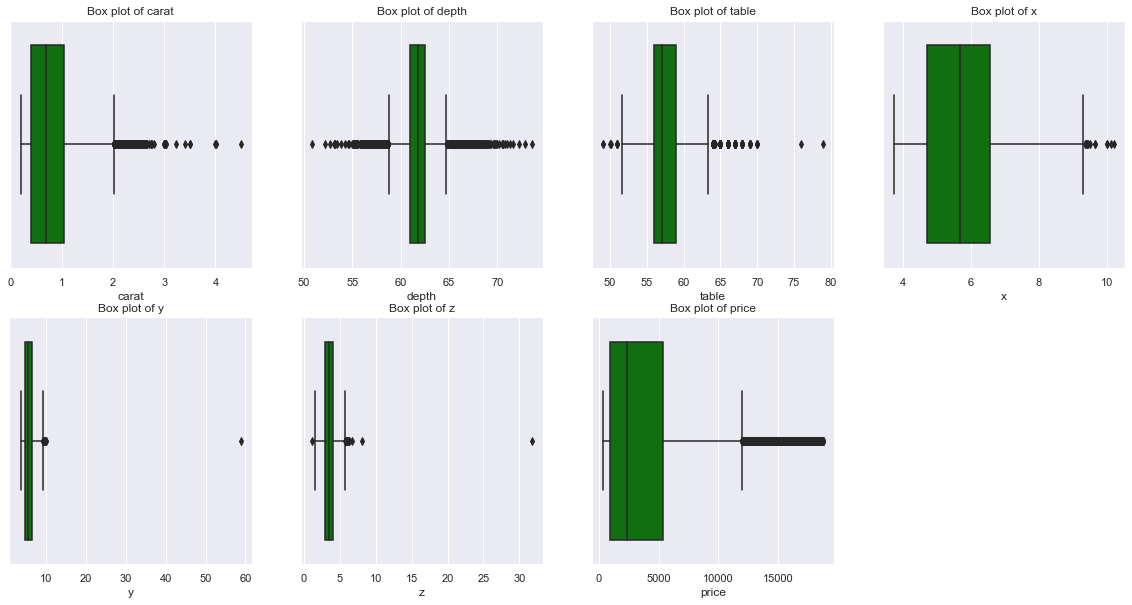

In [946]:
# Checking for Outliers
numeric_col_names=df1.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in df1.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df1 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


As evident from above box plot, there are outliers in all the numeric attributes

## Plot the Histograms

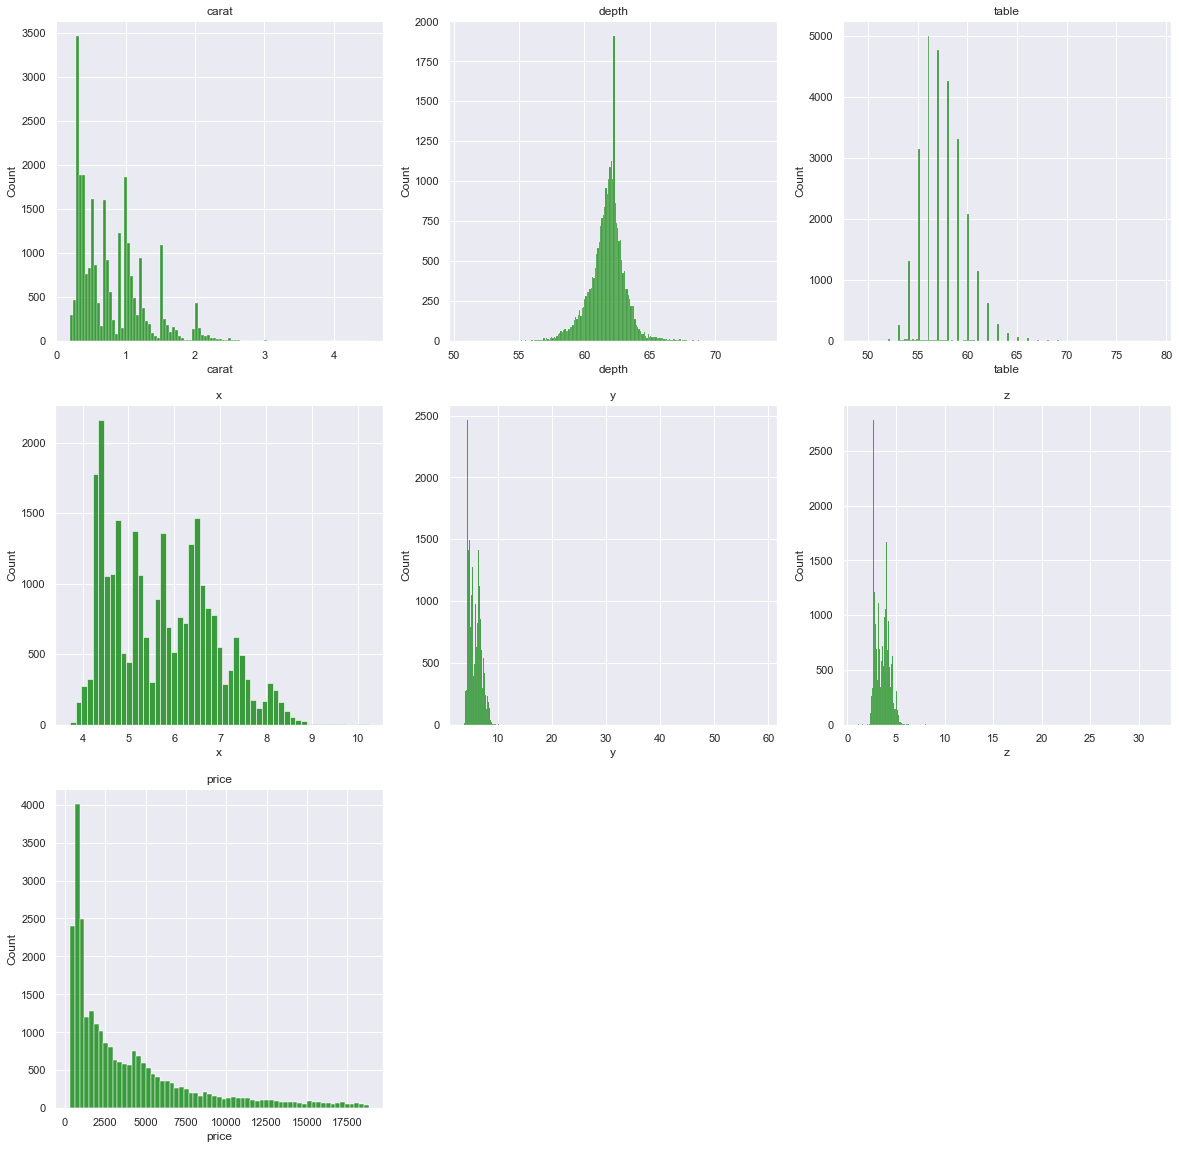

In [947]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df1.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df1[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


###### From histograms we can see that 
 - For majority of the zirconium, carot lies between 0.2 to 1. There is few occurrenc of Above 2 carats diamonds.
 - Length(x) of the cubic zirconia (in mm) is varying from 4 to 8
 - Width(y) of the cubic zirconia (in mm) is varying from 5 to 8
 - Height(z) of the cubic zirconia (in mm) is varying from 2.5 to 5
 - Majority of Depth ranges from 60 to 64
 - Majority of table value ranges from 55 to 63.


## Outlier Treatment (Flooring and Capping)

In [948]:
# taking backup before treating outliers
df1_bef_OT=df1.copy()


In [949]:
## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=round((Q3-Q1),2)
    lower_range= round(Q1-(1.5 * IQR),2)
    upper_range= round(Q3+(1.5 * IQR),2)
    return IQR, lower_range, upper_range

In [950]:
# creating a function to treate outlier and cap and floor upper and lower extreme values
def Outlier_treatment(df,numeric_col_names):   
    i=0;
    for i in df.columns:
        if (i in numeric_col_names):
            IQR, lr, ur = return_IQR_LR_UR(df[i])
            print ('col:', i , ',lower range :', lr, ',upper range:', ur, ',No of outliers:', df[(df[i]<lr)|(df[i]>ur)][i].count(), ',outlier %:', round(df[(df[i]<lr)|(df[i]>ur)][i].count()*100/df[i].count(),2))
            df[i] =np.where(df[i]>ur,ur,df[i])
            df[i] =np.where(df[i]<lr,lr,df[i])

    return df    

In [951]:
numeric_col_names[:-1]

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [952]:
df1=Outlier_treatment(df1,numeric_col_names[:-1])

col: carat ,lower range : -0.58 ,upper range: 2.03 ,No of outliers: 583 ,outlier %: 2.16
col: depth ,lower range : 58.75 ,upper range: 64.75 ,No of outliers: 1219 ,outlier %: 4.65
col: table ,lower range : 51.5 ,upper range: 63.5 ,No of outliers: 318 ,outlier %: 1.18
col: x ,lower range : 1.95 ,upper range: 9.31 ,No of outliers: 12 ,outlier %: 0.04
col: y ,lower range : 1.97 ,upper range: 9.29 ,No of outliers: 12 ,outlier %: 0.04
col: z ,lower range : 1.19 ,upper range: 5.75 ,No of outliers: 14 ,outlier %: 0.05


## Plotting Box Plot again after outlier's treatment

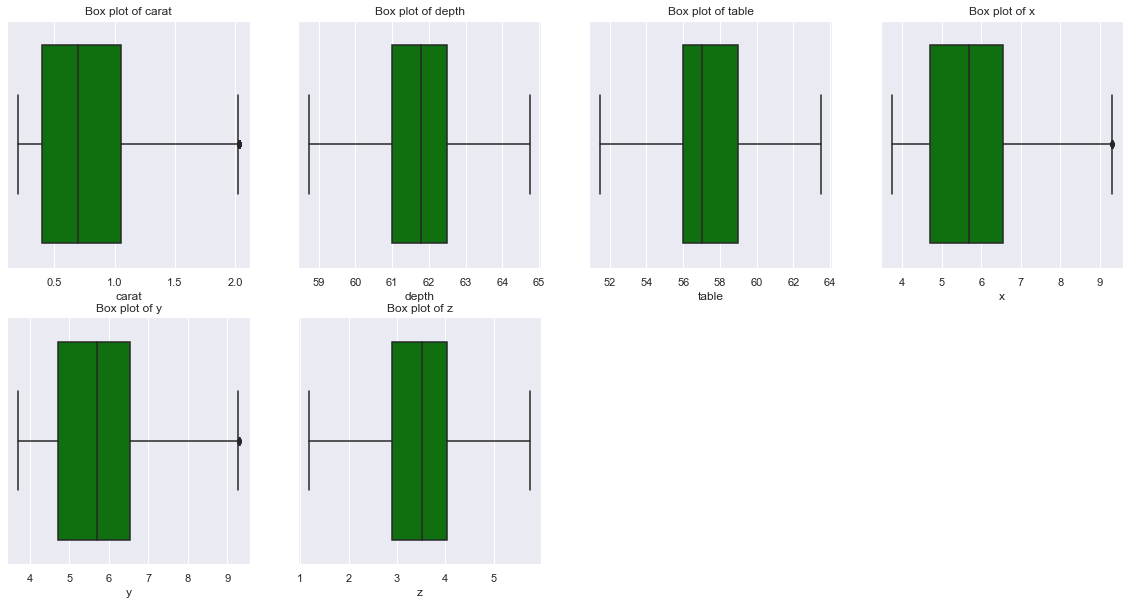

In [953]:
# Checking for Outliers
plt.figure(figsize= (20,10))
box_plot_no=1
no_of_graphs_rows=4
sns.set(font_scale=1)
rows=calc_rows(numeric_col_names[:-1], no_of_graphs_rows)

for col in df1.columns :
    if (col in numeric_col_names[:-1]):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df1 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

Now we can see that outliers have been removed.

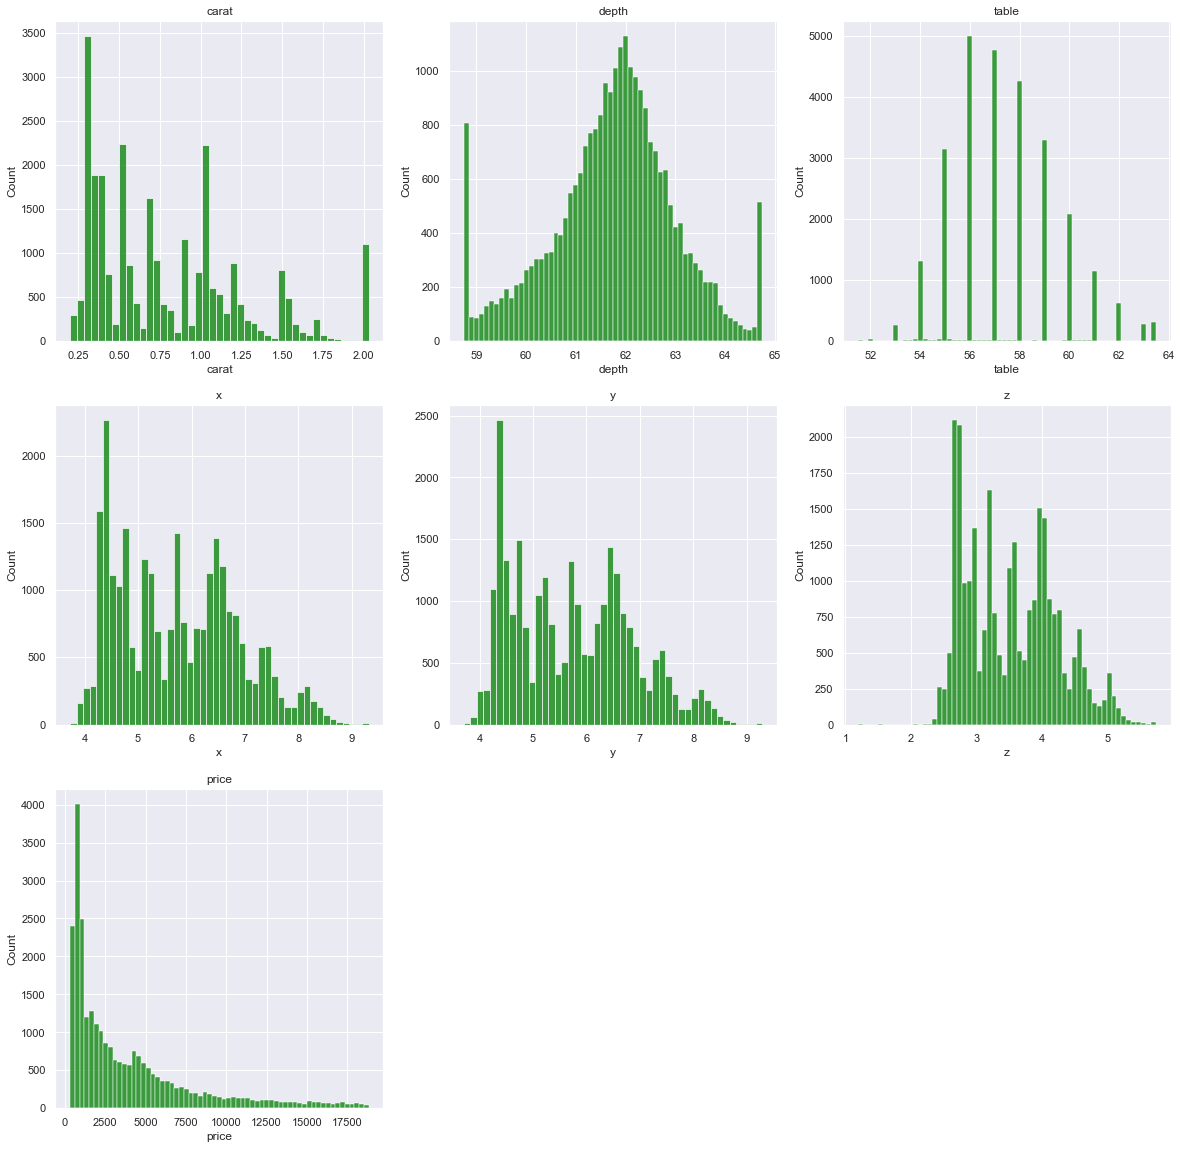

In [954]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df1.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df1[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Imputing missing values

As only Depth , x, y and z column contains the Null values and it contains outliers. We are imputing it with the Median.

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [955]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df1[numeric_col_names])

In [956]:
df1[numeric_col_names]=imputer.transform(df1[numeric_col_names])

In [957]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [958]:
missing_check(df1)

Total  Percent
carat        0      0.0
cut          0      0.0
color        0      0.0
clarity      0      0.0
depth        0      0.0
table        0      0.0
x            0      0.0
y            0      0.0
z            0      0.0
price        0      0.0

Now we can see that there are no null values

In [959]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


## Is Scaling necessary

Scaling is not required for the linear regression model. scaling centers the data but it would not affect the accurcay or residual errors.
Coefficients/intercepts value may change due to centring of data but error would not be affected by the scaling.
Hence its not required here.

## Log transformation of price 
Since price columns has outliers and have extreme values. It would be better if we proceed with the log transformation of price column, it would reduce the skewness of the dependent variable

In [960]:
# Transform an attribute using a mathematical transformation.
# We might want to do that to change the distribution shape of the data
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p,inverse_func=np.exp)

log_transformer

FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'exp'>)

In [961]:
df1['log_price'] = log_transformer.fit_transform(df1[['price']])

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:109: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn("The provided functions are not strictly"


In [962]:
df1

carat        cut color clarity  depth  table     x     y     z   price  \
1       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0   
2       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0   
3       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0   
4       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0   
5       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...     ...   
26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09  5408.0   
26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74  1114.0   
26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17  1656.0   
26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60   682.0   
26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27  5166.0   

       log_price  
1       6.214608  
2       6.892642  
3       8.746716  
4       6.987490  
5       6.659294  
...          ...  
26963   8.595820  
26964   7.016610  
26965   7.412764  
26966   6.526495  
26967   8.550048  

[26933 rows x 11 columns]

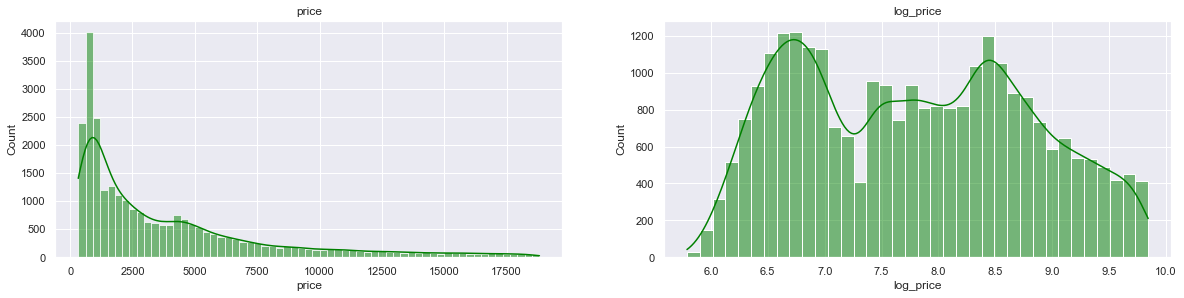

In [963]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=2
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
col_names = ['price','log_price']
for col in df1.columns :
    if (col in col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df1[col] ,kde=True,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


We can see that although price and log_price both are not normal but steep value(huge spike) have been reduced in log_price graph. Data is more evenly distributed in log_price as compared to price graph

In [964]:
print ('Skew of log price :-', df1.log_price.skew().round(2))
print ('Skew of price :-', df1.price.skew().round(2))

Skew of log price :- 0.13
Skew of price :- 1.62


We can see that skewness has reduced in log transformation 

# Bi-variate, and multivariate analysis

## Checking the unique values for categorical variables

In [965]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column,': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

cut :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


color :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


clarity :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




## Bar Plots

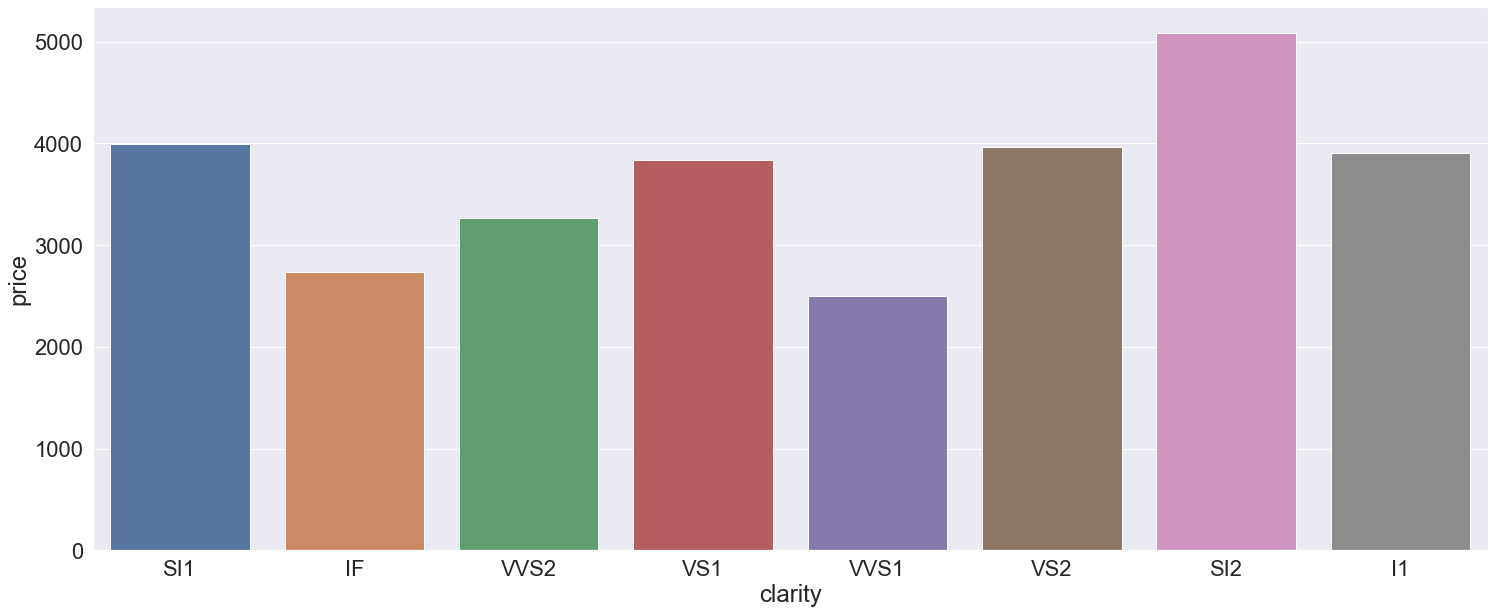

In [966]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
g=sns.barplot( 
               y="price",
               x="clarity",ci=False, 
               data=df1);

We can see that the mean price level is higheest for SI2 clarity and its lowest for VVS1

Important thing to notice here is that IF is second best clarity quality but still its mean price is among the lower side. Best clarity quality 'FL' data is not present.

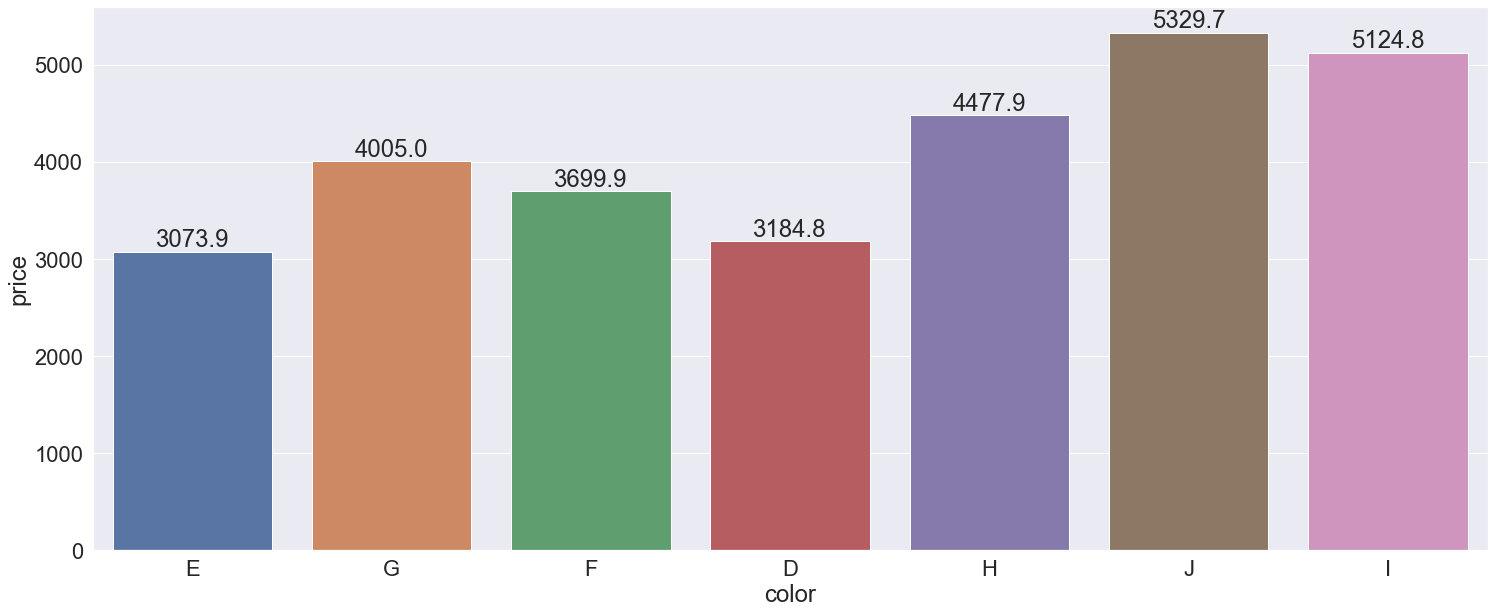

In [967]:
plt.figure(figsize=(25,10))

splot=sns.barplot(y="price", x="color",ci=False, data=df1);
sns.set(font_scale=2)
# adding annotation in graph   
for p in splot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    splot.annotate('{:.1f}'.format(y), (x.mean(), y),ha='center', va='bottom') # set the alignment of the text 

Price is lowest for color E and its highest for color l

Here too, best color 'D' is also among the lower price range.

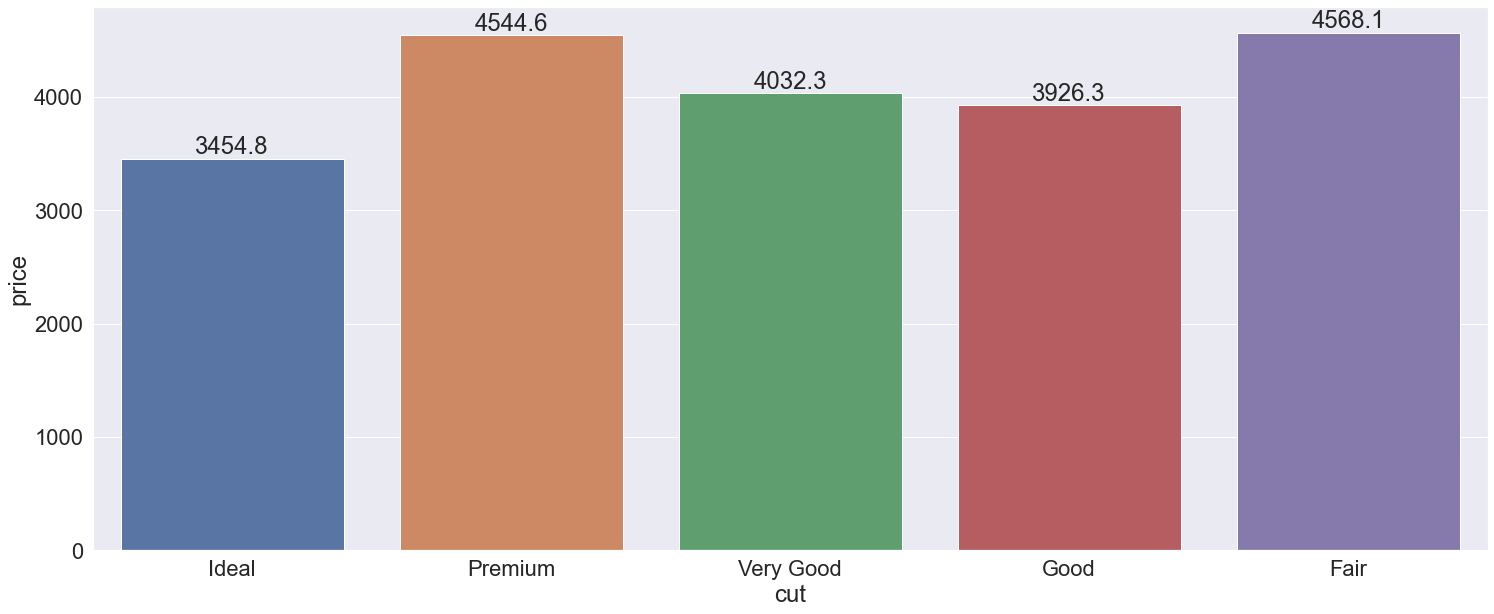

In [968]:
plt.figure(figsize=(25,10))

splot=sns.barplot(y="price", x="cut",ci=False, data=df1);
sns.set(font_scale=2)
# adding annotation in graph   
for p in splot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    splot.annotate('{:.1f}'.format(y), (x.mean(), y),ha='center', va='bottom') # set the alignment of the text 

Here too , best quality cut 'Ideal' has the lowest mean price

### Correlation matrix

In [969]:
Cor=df1.corr().round(2)
Cor

carat  depth  table     x     y     z  price  log_price
carat       1.00   0.03   0.19  0.98  0.98  0.98   0.92       0.93
depth       0.03   1.00  -0.29 -0.02 -0.02  0.09  -0.00       0.00
table       0.19  -0.29   1.00  0.20  0.19  0.16   0.13       0.16
x           0.98  -0.02   0.20  1.00  1.00  0.99   0.89       0.96
y           0.98  -0.02   0.19  1.00  1.00  0.99   0.89       0.96
z           0.98   0.09   0.16  0.99  0.99  1.00   0.88       0.96
price       0.92  -0.00   0.13  0.89  0.89  0.88   1.00       0.90
log_price   0.93   0.00   0.16  0.96  0.96  0.96   0.90       1.00

### Heat Map

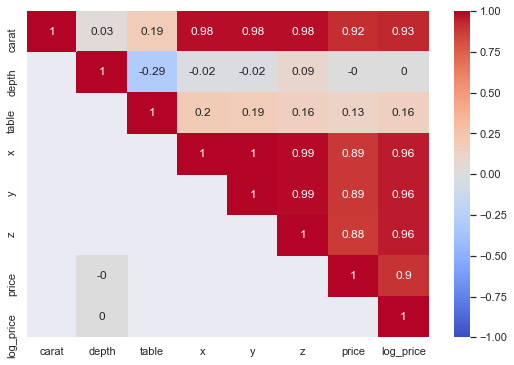

In [970]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

We can see in heatmap & correlation matrix that  
  - Price has strong correlation with length , width  height , carat.
  - There is no correlation of depth on price. It has slighly negative correlation with table attribute
  - Carat, length, width, height has strong correlation with each other . This means independent attributes have correlation with each other
  

Thus this dataset has multicolinearity problem

### Pairplot

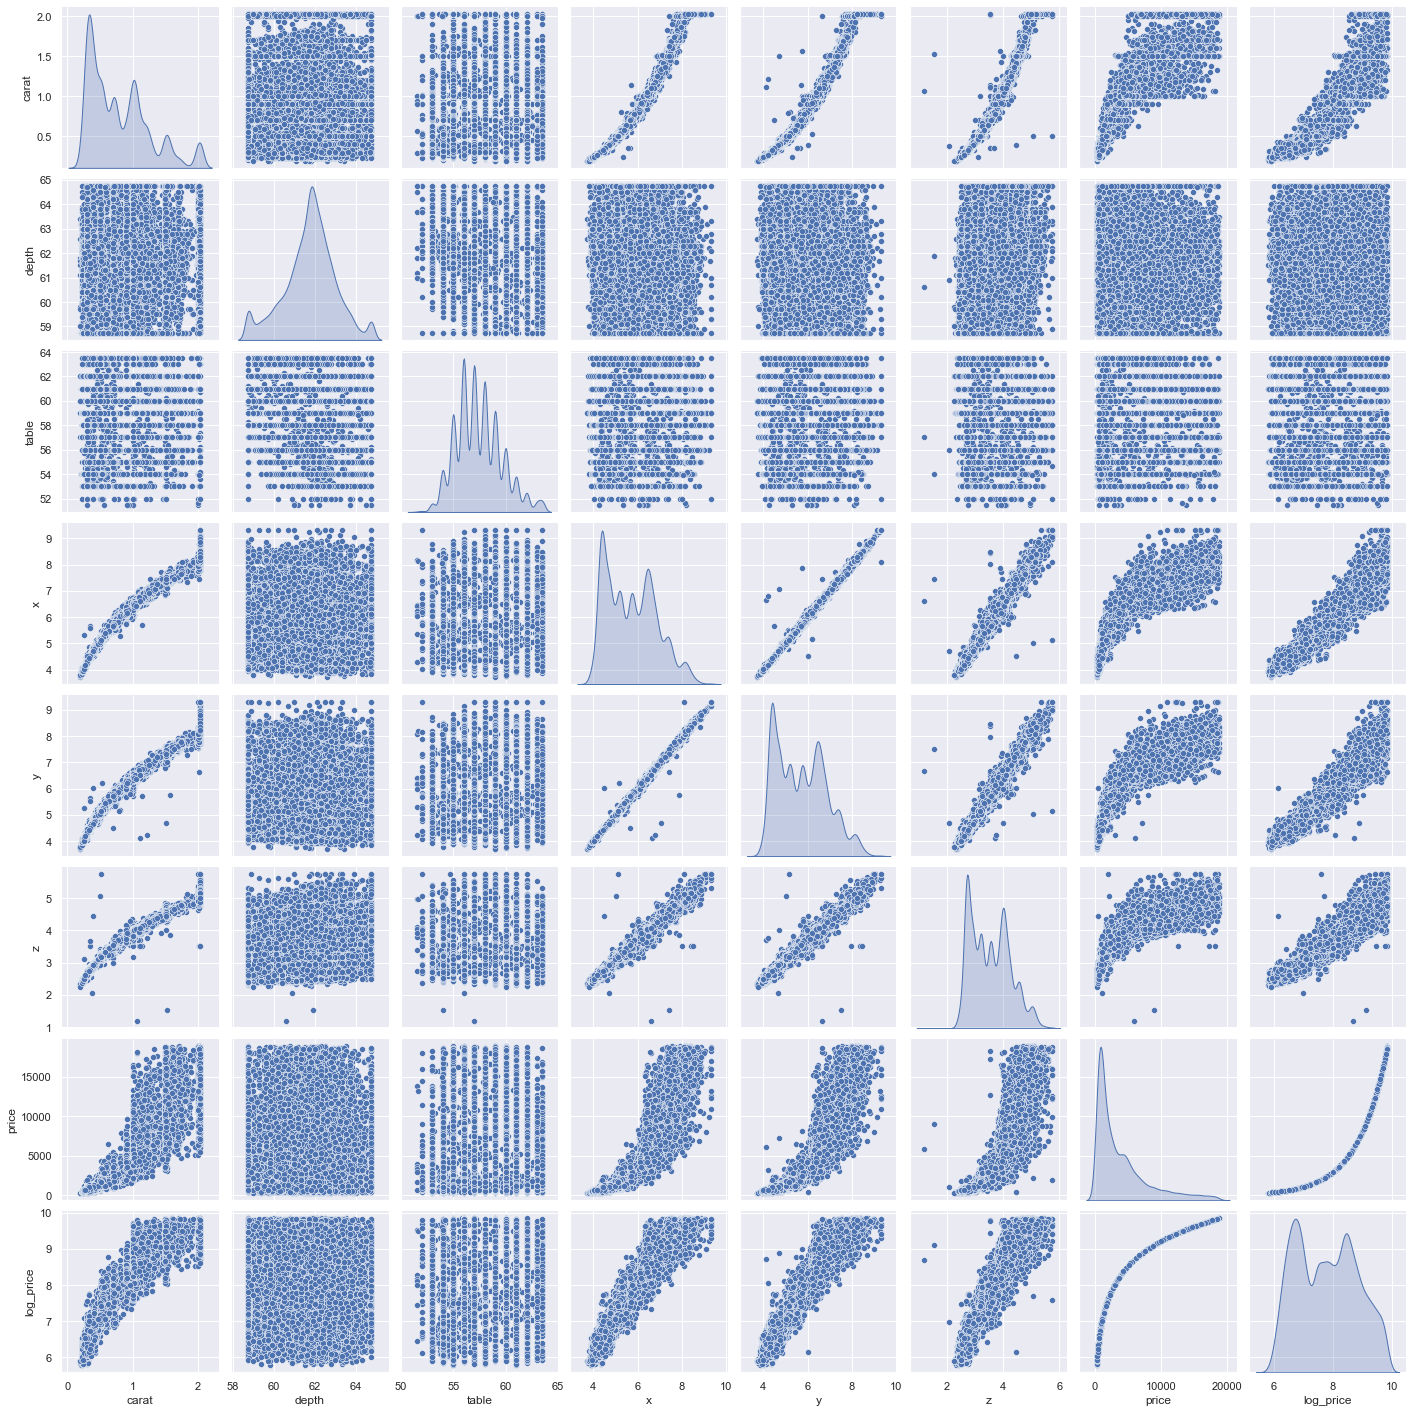

In [67]:
sns.pairplot (df1,diag_kind='kde')

As depicted in heat map of correlation matrix, we can see that price increases with increase in carat, x,y,z. 
Carat weight and length, width and height appears to have some structural correlation. As size of zirconium increases, its carat weight increases and if carat weight increases then its length/width/height should also increase

In distribution of carat, x, y & z there are multiple peaks. So it appears different class of data is present in these columns

Another important thing to notice here is that for table and depth there appears to be no correlation with price. We need to check whether these attributes have evidence to show that there is any relationship of price with these attributes

## VIF Checking for Multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [70]:
X = df1[['carat','table','x','y','z','depth']]
checkvif(X)

  Variables           VIF
0     carat    117.290747
1     table    696.217447
2         x  10214.077576
3         y   9247.015287
4         z   2601.306261
5     depth    931.535862


We can see that VIF is greator than 5 for all the columns. Hence all these independent columns are highly correlated with each ither and this data has a multicollinearity problem

Removing x and then checking the VIF

In [71]:
X = df1[['carat','table','y','z','depth']]
checkvif(X)

  Variables          VIF
0     carat   115.453366
1     table   655.889207
2         y  2021.917644
3         z  2433.025133
4     depth   911.203786


Removing z and then checking the VIF

In [72]:
X = df1[['carat','table','y','depth']]
checkvif(X)

  Variables         VIF
0     carat   92.408862
1     table  517.696218
2         y  647.570069
3     depth  526.038654


Removing y and then checking the VIF

In [73]:
X = df1[['carat','depth','table']]
checkvif(X)

  Variables         VIF
0     carat    4.048380
1     depth  446.207901
2     table  454.949118


Removing table and then checking the VIF

In [74]:
X = df1[['carat','depth']]
checkvif(X)

  Variables       VIF
0     carat  3.946744
1     depth  3.946744


Now we can see that there is no mutlicollinearity in the dataset

## Converting categorical to numeric variables

In [972]:
# taking backup copy
df1_bkp1=df1.copy()

In [973]:
df1.cut.replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[0,1,2,3,4],inplace=True )
df1.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J',],[6,5,4,3,2,1,0],inplace=True )
df1.clarity.replace(['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'],[10,9,8,7,6,5,4,3,2,1,0],inplace=True )

In [974]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      26933 non-null  float64
 1   cut        26933 non-null  int64  
 2   color      26933 non-null  int64  
 3   clarity    26933 non-null  int64  
 4   depth      26933 non-null  float64
 5   table      26933 non-null  float64
 6   x          26933 non-null  float64
 7   y          26933 non-null  float64
 8   z          26933 non-null  float64
 9   price      26933 non-null  float64
 10  log_price  26933 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.5 MB


We can see that all the attributes are numerical now

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Train-Test Split

In [975]:
# Copy all the predictor variables into X dataframe
X = df1.drop(['log_price'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = df1[['log_price']]

In [976]:
X.head()

carat  cut  color  clarity  depth  table     x     y     z   price
1   0.30    4      5        4   62.1   58.0  4.27  4.29  2.66   499.0
2   0.33    3      3        9   60.8   58.0  4.42  4.46  2.70   984.0
3   0.90    2      5        7   62.2   60.0  6.04  6.12  3.78  6289.0
4   0.42    4      4        6   61.6   56.0  4.82  4.80  2.96  1082.0
5   0.31    4      4        8   60.4   59.0  4.35  4.43  2.65   779.0

In [977]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [978]:
X_train_bkp = X_train.copy()
X_test_bkp = X_test.copy()

In [979]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [980]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

### Linear Regression Model

In [981]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [982]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is -1.0202873340043548
The coefficient for cut is 0.026650203007287158
The coefficient for color is 0.08029557576207384
The coefficient for clarity is 0.12128135115597725
The coefficient for depth is 0.04797794002096829
The coefficient for table is 0.00996335613264138
The coefficient for x is 0.7372589515317397
The coefficient for y is 0.45437413118636044
The coefficient for z is 0.3193892009319381


In [983]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.864234287361503


In [984]:
# R square on training data
regression_model.score(X_train, y_train)


0.9763153115042822

In [985]:
scores_train.append(regression_model.score(X_train, y_train))

around 97% of the variation in the zirconium price is explained by the predictors in the model for train set

In [986]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9759279412402047

In [987]:
scores_test.append(regression_model.score(X_test, y_test))

around 97% of the variation in the zirconium price is explained for test data set too.

In [988]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
#np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [989]:
X_train_bkp["predicted_LR"] = log_transformer.inverse_transform(predicted_train)
X_train_bkp

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...     ...   
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61   673.0   
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54  1657.0   
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19  6354.0   
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05  4845.0   
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24  8446.0   

       predicted_LR  
22115    573.087535  
2276     626.538235  
19184   1193.289112  
5031    5064.047015  
25415   4679.565240  
...             ...  
10963    796.010229  
17305   2318.564710  
5194    7151.584677  
12180   5164.308167  
236    10666.117713  

[18853 rows x 11 columns]

In [998]:
np.sqrt(metrics.mean_squared_error(X_train_bkp['price'],X_train_bkp["predicted_LR"]))

1763.685852397315

In [999]:
rmse_train.append(np.sqrt(metrics.mean_squared_error(X_train_bkp['price'],X_train_bkp["predicted_LR"])))

In [1000]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
#np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [1001]:
X_test_bkp["predicted_LR"] = log_transformer.inverse_transform(predicted_test)
X_test_bkp

carat  cut  color  clarity  depth  table     x     y     z    price  \
16998   1.26    3      1        4  60.50   62.0  6.97  6.92  4.20   5292.0   
24458   0.90    2      3        5  58.75   59.0  6.35  6.36  3.72   4484.0   
16613   1.37    4      4        6  59.60   57.0  7.28  7.22  4.32  11649.0   
309     0.84    1      3        6  63.60   57.0  5.98  5.93  3.79   3316.0   
26653   2.00    2      0        5  60.80   62.0  8.09  8.12  4.93  13043.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...      ...   
25017   0.34    4      5        6  61.20   57.0  4.51  4.45  2.74   1033.0   
8486    1.01    2      5        5  62.20   58.0  6.36  6.41  3.97   6522.0   
26892   1.01    3      1        5  62.50   58.0  6.39  6.44  4.01   4592.0   
17456   1.01    1      2        4  60.30   63.5  6.53  6.50  3.93   4642.0   
26170   1.02    3      2        4  61.90   61.0  6.42  6.34  3.95   4558.0   

       predicted_LR  
16998   5655.406315  
24458   3960.733971  
16613  11480.756377  
309     3666.489244  
26653  13605.326693  
...             ...  
25017    854.849313  
8486    5421.041915  
26892   4300.253071  
17456   4131.176565  
26170   3920.054410  

[8080 rows x 11 columns]

In [1002]:
np.sqrt(metrics.mean_squared_error(X_test_bkp['price'],X_test_bkp["predicted_LR"]))

1597.3490579838347

In [995]:
rmse_test.append(np.sqrt(metrics.mean_squared_error(X_test_bkp['price'],X_test_bkp["predicted_LR"])))

In [996]:
X_train_bkp[X_train_bkp['predicted_LR']<0]


Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR]
Index: []

We can see no negative predictions in test dataset

In [997]:
X_test_bkp[X_test_bkp['predicted_LR']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR]
Index: []

We can see no negative predictions in test dataset

### Linear Regression using statsmodels

In [1003]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_bkp, y_train], axis=1)
data_train = data_train.drop('predicted_LR',axis=1)
data_test=pd.concat([X_test_bkp,y_test],axis=1)
data_test = data_test.drop('predicted_LR',axis=1)
data_train.head()

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   

       log_price  
22115   6.287859  
2276    6.739337  
19184   7.123673  
5031    8.310415  
25415   8.308446

In [1004]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'log_price'],
      dtype='object')

In [103]:
expr= 'log_price ~  carat + cut + color+clarity +depth + table + x + y + z  '

In [104]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -3.864234
carat       -1.020287
cut          0.026650
color        0.080296
clarity      0.121281
depth        0.047978
table        0.009963
x            0.737259
y            0.454374
z            0.319389
dtype: float64

In [105]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 8.630e+04
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:08:09   Log-Likelihood:                 8202.1
No. Observations:               18853   AIC:                        -1.638e+04
Df Residuals:                   18843   BIC:                        -1.631e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8642      0.137    -28.226      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [106]:
# Calculate MSE for train
mse = np.mean((log_transformer.inverse_transform(lm1.predict(data_train.drop('log_price',axis=1)))-data_train['price'])**2)

In [107]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1763.6858523972169

In [108]:
# np.sqrt(lm1.mse_resid) #another way

In [109]:
# Prediction on Test data
y_pred = log_transformer.inverse_transform(lm1.predict(data_test))

In [110]:
# Calculate MSE for test
mse = np.mean((log_transformer.inverse_transform(lm1.predict(data_test.drop('log_price',axis=1)))-data_test['price'])**2)

In [111]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1597.3490579837476

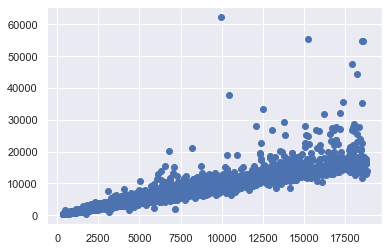

In [112]:
plt.scatter(data_test['price'], y_pred)
plt.show()

In [113]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3.86) * Intercept + (-1.02) * carat + (0.03) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.74) * x + (0.45) * y + (0.32) * z + 

# Performing PCA

## Scaling

In [1006]:
ss=StandardScaler() 


In [1007]:
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(18853, 9)
(18853, 9)
(8080, 9)
(8080, 9)


In [1008]:
x_train_scaled[0]

array([-0.98333162, -0.8264737 , -0.81908314, -0.03462647,  0.5312116 ,
        1.19410878, -1.17626173, -1.15924109, -1.12166084])

In [1009]:
X_train

carat  cut  color  clarity  depth  table     x     y     z
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24

[18853 rows x 9 columns]

Train and test dataframe have been scaled now

## 1. Bartlett Test of Sphericity

#### Compares your correlation matrix (a matrix of Pearson correlations) to the identity matrix.
#### p-value should be less than 0.05 to proceed for dimension reduction

### Null hypothesis =  All the dimensions are equal
### Alternate hypothesis  =  atleast one dimension is not equal or there is a difference in the dimensions



In [1010]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x_train_scaled)
chi_square_value, p_value

(292921.1425906154, 0.0)

p-value is low...............hence we shall go with alternative hypothesis.It means that dimension reduction is possible in the dataset given

## 2. Kaiser-Meyer-Olkin (KMO) Test
#### 1. KMO Test for Sample Adequacy
#### 2. KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [1011]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x_train_scaled)
print(kmo_all,kmo_model)

[0.97926197 0.50582774 0.91697366 0.91264907 0.1362295  0.53860818
 0.80381167 0.79844035 0.78212634] 0.7721386736349162


#### Overall Measure of Sample Adequacy (MSA) is greater than 0.5. Hence we have adequate sample to proceed with PCA

## Use PCA from sklearn's decomposition class and find Principal Components

In [1012]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
PC_components_req = 9
pca = PCA(n_components=PC_components_req)
pc=pca.fit_transform(x_train_scaled)
pc_comps = ['PC' + str(i) for i in range(1,PC_components_req+1)]

In [1013]:
pca_summ = pd.DataFrame(pc_comps,columns=['PCs'])
pca_summ['Proportion Of Variance'] = np.round(pca.explained_variance_ratio_ * 100,2)
pca_summ['Standard Deviation'] = np.round(np.sqrt(pca.explained_variance_),2)
pca_summ['Cumulative Proportion'] = np.round(np.cumsum(pca.explained_variance_ratio_*100),2)
pca_summ

PCs  Proportion Of Variance  Standard Deviation  Cumulative Proportion
0  PC1                   47.92                2.08                  47.92
1  PC2                   15.53                1.18                  63.46
2  PC3                   13.53                1.10                  76.98
3  PC4                   10.97                0.99                  87.96
4  PC5                    7.76                0.84                  95.71
5  PC6                    3.98                0.60                  99.69
6  PC7                    0.26                0.15                  99.95
7  PC8                    0.03                0.06                  99.99
8  PC9                    0.01                0.04                 100.00

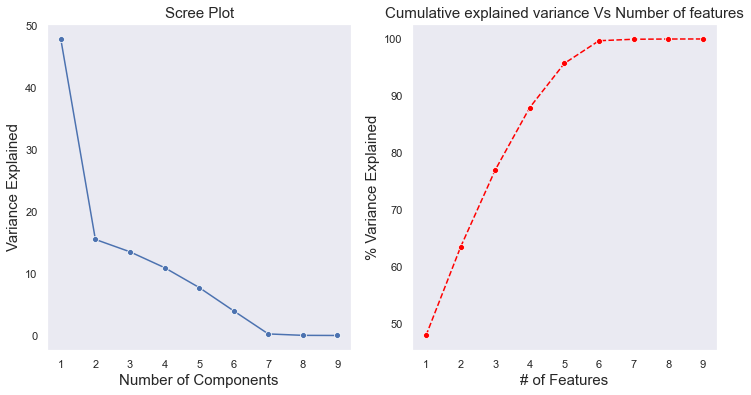

In [1014]:
## Plotting the scree plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(y=pca_summ['Proportion Of Variance'],x=range(1,PC_components_req+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.subplot(1,2,2)
#plt.plot(y=var, x=range(1,len(var)+1),marker='o',linestyle='--',color='red')
sns.lineplot(y=pca_summ['Cumulative Proportion'], x=range(1,PC_components_req+1),marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative explained variance Vs Number of features',fontsize=15)
plt.grid()



From these graphs we can see that if we chose 6 PC's then 99% variance is getting explained and our dimension is getting reduced from 9 to 6.

In [1015]:
PC_components_req = 6
pca = PCA(n_components=PC_components_req)
pc_comps = ['PC' + str(i) for i in range(1,PC_components_req+1)]

In [1016]:
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
x_train_pca = pd.DataFrame(x_train_pca,columns=pc_comps,index=X_train.index)
x_test_pca = pd.DataFrame(x_test_pca,columns=pc_comps,index=X_test.index)


## Correlation between components and features


In [1017]:
df1_comp = pd.DataFrame(pca.components_,columns=list(X_train),index=pc_comps)
df1_comp.round(2)

carat   cut  color  clarity  depth  table     x     y     z
PC1   0.47 -0.11  -0.16    -0.22   0.02   0.13  0.47  0.47  0.47
PC2  -0.09 -0.60   0.19    -0.20  -0.19   0.70 -0.08 -0.08 -0.10
PC3  -0.04 -0.45  -0.00    -0.19   0.84  -0.23 -0.07 -0.08  0.02
PC4  -0.01 -0.21  -0.80     0.53   0.05   0.18 -0.04 -0.04 -0.04
PC5   0.13 -0.17   0.55     0.77   0.12   0.02  0.11  0.12  0.13
PC6  -0.01 -0.59  -0.03    -0.02  -0.49  -0.64  0.03  0.04 -0.02

PC1 : 0.43 * carat -0.09 * cut - 0.14 *color - 0.19 *clarity + 0.01 * depth + 0.11 * table + 0.43 *x + 0.43 *y + 0.43*z 

PC5 : -0.01 * carat -0.59 * cut - 0.03 *color - 0.02 *clarity - 0.49 * depth - 0.64 * table + 0.03 *x + 0.04 *y - 0.02*z 

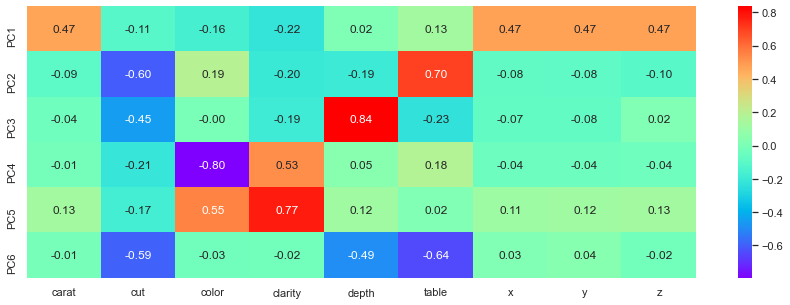

In [1018]:
plt.figure(figsize=(15,5))
sns.heatmap(df1_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=pc_comps)
plt.show()

We can see that PC1 is a combination of Carat and its length, width , height
PC2 is a combination of table and cut

In [1019]:
# creating dataframe of PC scores
print (x_train_pca.shape)
print (x_test_pca.shape)

(18853, 6)
(8080, 6)


## Checking correlation of dataset after PCA dimension reduction

In [1020]:
pd.concat([x_train_pca,x_test_pca], axis=0).corr().round(2)

PC1   PC2  PC3   PC4   PC5   PC6
PC1  1.0 -0.00 -0.0 -0.00 -0.00  0.00
PC2 -0.0  1.00  0.0 -0.00  0.01  0.00
PC3 -0.0  0.00  1.0  0.00  0.00 -0.00
PC4 -0.0 -0.00  0.0  1.00 -0.00  0.01
PC5 -0.0  0.01  0.0 -0.00  1.00 -0.00
PC6  0.0  0.00 -0.0  0.01 -0.00  1.00

We can see that correlation is 0 for off diagonal elements. Hence multicollinearity has been removed

## Checking VIF

In [1021]:
checkvif(pd.concat([x_train_pca,x_test_pca], axis=0))

  Variables       VIF
0       PC1  1.000043
1       PC2  1.000056
2       PC3  1.000020
3       PC4  1.000079
4       PC5  1.000066
5       PC6  1.000086


We can see that VIF is 1 for all the PC's. Hence multicolinearity has been removed.

### Linear Regression Model after PCA

In [1022]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train_pca, y_train)

LinearRegression()

In [1023]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train_pca.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for PC1 is 0.4502114007573329
The coefficient for PC2 is -0.11685823373711149
The coefficient for PC3 is -0.08450759301734528
The coefficient for PC4 is -0.059037742690766726
The coefficient for PC5 is 0.35551846447377305
The coefficient for PC6 is -0.029623295753423554


In [1024]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.783340582033334


In [1025]:
# R square on training data
regression_model.score(x_train_pca, y_train)

0.9598691080691446

In [1026]:
scores_train.append(regression_model.score(x_train_pca, y_train))

around 95% of the variation in the zirconium price is explained by the predictors in the model for train set

In [1027]:
# R square on testing data
regression_model.score(x_test_pca, y_test)

0.9579513261268165

In [1028]:
scores_test.append(regression_model.score(x_test_pca, y_test))

around 95% of the variation in the zirconium price is explained for test data set too.

In [1029]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train_pca, y_train).predict(x_train_pca)
#np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [1030]:
X_train_bkp["predicted_LR_PCA"] = log_transformer.inverse_transform(predicted_train)
X_train_bkp

carat  cut  color  clarity  depth  table     x     y     z   price  \
22115   0.34    2      2        5   62.4   60.0  4.41  4.44  2.76   537.0   
2276    0.30    4      5        5   61.2   55.0  4.35  4.31  2.65   844.0   
19184   0.50    4      3        4   62.5   57.0  5.09  5.05  3.17  1240.0   
5031    1.10    1      5        3   63.3   56.0  6.53  6.58  4.15  4065.0   
25415   1.02    3      4        3   61.1   62.0  6.54  6.49  3.98  4057.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...     ...   
10963   0.29    4      3        9   61.3   55.0  4.25  4.28  2.61   673.0   
17305   0.70    4      0        6   61.6   57.0  5.72  5.77  3.54  1657.0   
5194    1.22    3      1        6   60.6   61.0  6.94  6.88  4.19  6354.0   
12180   1.03    0      6        4   64.4   61.0  6.33  6.25  4.05  4845.0   
236     1.21    3      2        9   62.2   58.0  6.83  6.80  4.24  8446.0   

       predicted_LR  predicted_LR_PCA  
22115    573.087535        629.752078  
2276     626.538235        734.836990  
19184   1193.289112       1120.634920  
5031    5064.047015       4806.463708  
25415   4679.565240       4106.216857  
...             ...               ...  
10963    796.010229        916.864726  
17305   2318.564710       1935.363273  
5194    7151.584677       6482.909434  
12180   5164.308167       4837.913404  
236    10666.117713       9556.747461  

[18853 rows x 12 columns]

In [1031]:
np.sqrt(metrics.mean_squared_error(X_train_bkp['price'],X_train_bkp["predicted_LR_PCA"]))

2127.5550472650098

In [1032]:
rmse_train.append(np.sqrt(metrics.mean_squared_error(X_train_bkp['price'],X_train_bkp["predicted_LR_PCA"])))

In [1033]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train_pca, y_train).predict(x_test_pca)
#np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [1034]:
X_test_bkp["predicted_LR_PCA"] = log_transformer.inverse_transform(predicted_test)
X_test_bkp

carat  cut  color  clarity  depth  table     x     y     z    price  \
16998   1.26    3      1        4  60.50   62.0  6.97  6.92  4.20   5292.0   
24458   0.90    2      3        5  58.75   59.0  6.35  6.36  3.72   4484.0   
16613   1.37    4      4        6  59.60   57.0  7.28  7.22  4.32  11649.0   
309     0.84    1      3        6  63.60   57.0  5.98  5.93  3.79   3316.0   
26653   2.00    2      0        5  60.80   62.0  8.09  8.12  4.93  13043.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...      ...   
25017   0.34    4      5        6  61.20   57.0  4.51  4.45  2.74   1033.0   
8486    1.01    2      5        5  62.20   58.0  6.36  6.41  3.97   6522.0   
26892   1.01    3      1        5  62.50   58.0  6.39  6.44  4.01   4592.0   
17456   1.01    1      2        4  60.30   63.5  6.53  6.50  3.93   4642.0   
26170   1.02    3      2        4  61.90   61.0  6.42  6.34  3.95   4558.0   

       predicted_LR  predicted_LR_PCA  
16998   5655.406315       5446.519432  
24458   3960.733971       3429.569554  
16613  11480.756377      11317.690586  
309     3666.489244       3166.224387  
26653  13605.326693      19866.883532  
...             ...               ...  
25017    854.849313        949.660002  
8486    5421.041915       5016.737633  
26892   4300.253071       3747.869183  
17456   4131.176565       3587.454370  
26170   3920.054410       3575.322659  

[8080 rows x 12 columns]

In [1035]:
np.sqrt(metrics.mean_squared_error(X_test_bkp['price'],X_test_bkp["predicted_LR_PCA"]))

2157.4699108376585

In [1036]:
rmse_test.append(np.sqrt(metrics.mean_squared_error(X_test_bkp['price'],X_test_bkp["predicted_LR_PCA"])))

In [1037]:
X_train_bkp[X_train_bkp['predicted_LR_PCA']<0]


Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR, predicted_LR_PCA]
Index: []

In [1038]:
X_test_bkp[X_test_bkp['predicted_LR_PCA']<0]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price, predicted_LR, predicted_LR_PCA]
Index: []

We can see that there are no negative predictions for test and train data set

### Linear Regression using statsmodels after PCA

In [1039]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train_pca, y_train], axis=1)
data_test=pd.concat([x_test_pca,y_test],axis=1)
data_train.head()

PC1       PC2       PC3       PC4       PC5       PC6  log_price
22115 -1.701975  1.481623  0.731067  1.200851 -0.793997 -0.551283   6.287859
2276  -2.709139 -0.666717 -0.349456 -1.045178 -0.350557  0.287787   6.739337
19184 -1.061146 -0.552624  0.339556 -0.297121 -1.011561 -0.751228   7.123673
5031   1.684835  0.495947  2.101295 -1.200345  0.352957  0.843023   8.310415
25415  1.680392  1.626652 -0.828339 -0.680780 -0.485291 -1.107583   8.308446

In [1040]:
data_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'log_price'], dtype='object')

In [1041]:
expr= 'log_price ~  PC1 + PC2 + PC3 + PC4 +PC5 + PC6 '

In [1042]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    7.783341
PC1          0.450211
PC2         -0.116858
PC3         -0.084508
PC4         -0.059038
PC5          0.355518
PC6         -0.029623
dtype: float64

In [1043]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 7.513e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:20:40   Log-Likelihood:                 3231.3
No. Observations:               18853   AIC:                            -6449.
Df Residuals:                   18846   BIC:                            -6394.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7833      0.001   5241.414      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

p value for all the attributes is less than 0.05. Hence all are affecting the price of zirconium

In [1044]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(7.78) * Intercept + (0.45) * PC1 + (-0.12) * PC2 + (-0.08) * PC3 + (-0.06) * PC4 + (0.36) * PC5 + (-0.03) * PC6 + 

Here we can see that PC1 (explaining maximum variance of independent variables) is a majorly a combination of Carat and its length , width , height. Overall we can see a positive impact on the price due to this factor. As thhe PC1 increases , log price also increases.


## Running other regression models

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [1068]:
# taking backup of list
rmse_train_bkp = rmse_train.copy()
rmse_test_bkp = rmse_test.copy()
scores_train_bkp = scores_train.copy()
scores_test_bkp = scores_test.copy()

In [1046]:
# rmse_train = rmse_train_bkp.copy()
# rmse_test = rmse_test_bkp.copy()
# scores_train = scores_train_bkp.copy()
# scores_test = scores_test_bkp.copy()

In [1053]:
scores_test

[0.9759279412402047,
 0.9579513261268165,
 0.983474792505943,
 0.9911437500835093,
 0.9880995070842641]

In [1048]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=1)
dtr = tree.DecisionTreeRegressor(random_state=1)


In [1049]:
#models=[regression_model,dtr,rfr,annr]
models=[dtr,rfr,annr]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr):       
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        X_train_bkp["predicted_"+str(i)] =log_transformer.inverse_transform(i.predict(X_train))
        rmse_train.append(np.sqrt(mean_squared_error(X_train_bkp["price"],X_train_bkp["predicted_"+str(i)])))
        X_test_bkp["predicted_"+str(i)] =log_transformer.inverse_transform(i.predict(X_test))                                                                     
        rmse_test.append(np.sqrt(mean_squared_error(X_test_bkp["price"],X_test_bkp["predicted_"+str(i)])))
    else:                         
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        X_train_bkp["predicted_"+str(i)] =log_transformer.inverse_transform(i.predict(x_train_scaled))
        X_test_bkp["predicted_"+str(i)] =log_transformer.inverse_transform(i.predict(x_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(X_train_bkp["price"],log_transformer.inverse_transform(i.predict(x_train_scaled)))))
        rmse_test.append(np.sqrt(mean_squared_error(X_test_bkp["price"],log_transformer.inverse_transform(i.predict(x_test_scaled)))))
        


<ipython-input-1049-03832cefef42>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)
C:\Users\Raghav Gupta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [1069]:

# print ('rmse_train:',rmse_train)
# print ('rmse_test:',rmse_test)
# print ('scores_train:',scores_train)
# print ('scores_test:',scores_test)



In [1070]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Reg bef PCA','Linear Reg after PCA','Decision Tree Reg','Random Forest Reg', 'ANN Reg']))

                       Train RMSE    Test RMSE  Training Score  Test Score
Linear Reg bef PCA    1763.685852  1597.349058        0.976315    0.975928
Linear Reg after PCA  2127.555047  2157.469911        0.959869    0.957951
Decision Tree Reg        3.534912   768.168353        0.999995    0.983475
Random Forest Reg      216.739108   568.248918        0.998776    0.991144
ANN Reg                599.872909   638.599335        0.989860    0.988100


<b> On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 1-2% range. Hence no pruning is required here.

We can see that Decision Tree, Random Forest and Aritificial Nueral Network are giving good results and have r2 results close to 99%.

Among all these models we will go for Randorm forecst which has around 99% R2 score and Root mean square error is also these least (568) for test dataset
</b>



### Variable Importance

In [1071]:
df1_fi_rf=pd.DataFrame(rfr.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df1_fi_dtr=pd.DataFrame(dtr.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)

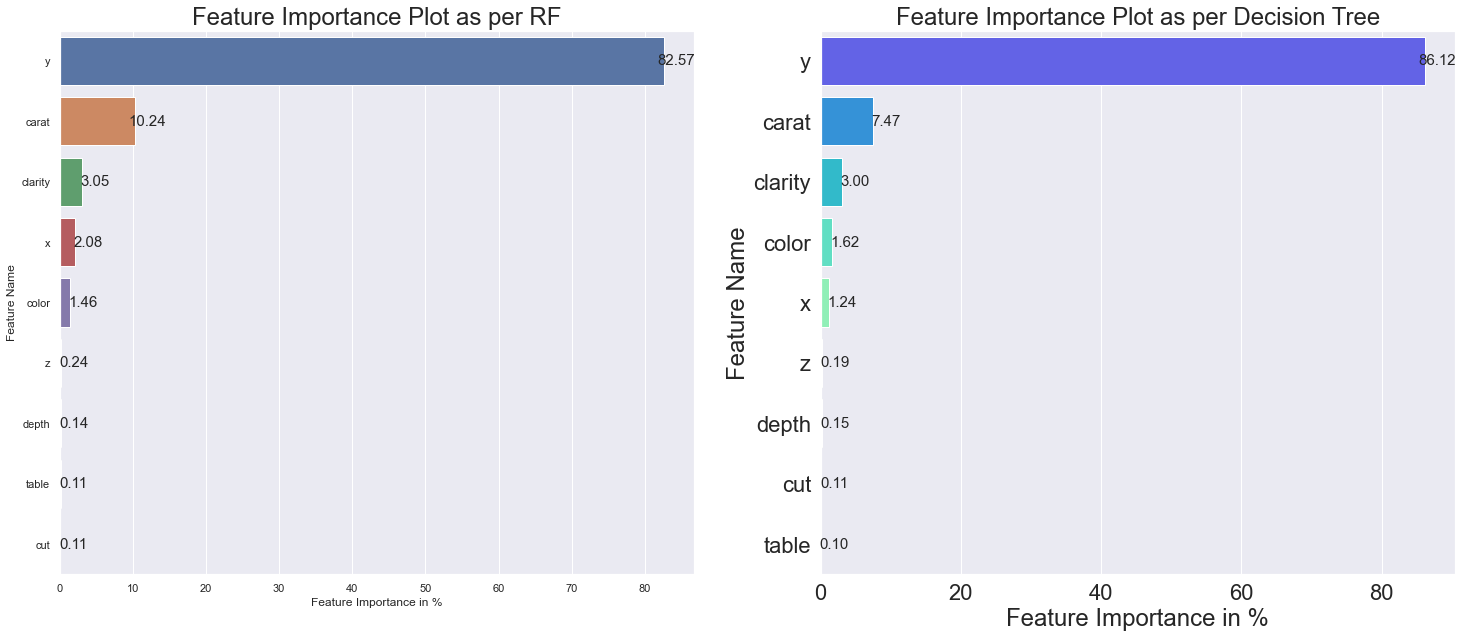

In [1072]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.set(font_scale=2)
plots=sns.barplot(data=df1_fi_rf,x="Important Feature",y=df1_fi_rf.index)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot as per RF')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=15, xytext=(13, 0), 
                   textcoords='offset points') 

plt.subplot(1,2,2)
sns.set(font_scale=2)
plots=sns.barplot(data=df1_fi_dtr,x="Important Feature",y=df1_fi_dtr.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot as per Decision Tree');

#Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=15, xytext=(13, 0), 
                   textcoords='offset points') 
# plt.show()


In [1073]:
from mpl_toolkits import mplot3d

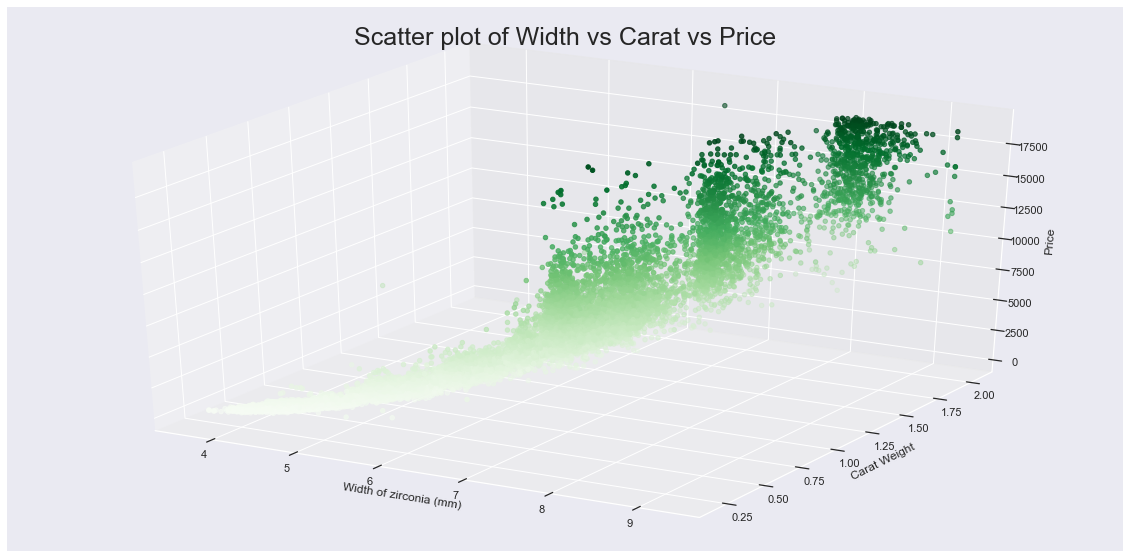

In [1074]:
fig = plt.figure(figsize=(20,10))
sns.set(font_scale=1)
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_bkp['y'], X_train_bkp['carat'], X_train_bkp['price'], c=X_train_bkp['price'],cmap='Greens')
ax.set(xlabel = "Width of zirconia (mm)",ylabel="Carat Weight",zlabel="Price")
ax.set_title("Scatter plot of Width vs Carat vs Price",fontsize=25);


In [1075]:
X_train_bkp.describe()

carat           cut         color       clarity         depth  \
count  18853.000000  18853.000000  18853.000000  18853.000000  18853.000000   
mean       0.792753      2.914337      3.395481      5.057073     61.744205   
std        0.460440      1.106341      1.703756      1.648296      1.234559   
min        0.200000      0.000000      0.000000      2.000000     58.750000   
25%        0.400000      2.000000      2.000000      4.000000     61.100000   
50%        0.700000      3.000000      3.000000      5.000000     61.800000   
75%        1.050000      4.000000      5.000000      6.000000     62.500000   
max        2.030000      4.000000      6.000000      9.000000     64.750000   

              table             x             y             z         price  \
count  18853.000000  18853.000000  18853.000000  18853.000000  18853.000000   
mean      57.428351      5.729531      5.731441      3.537587   3934.007532   
std        2.153671      1.121830      1.114070      0.693265   4009.563895   
min       51.500000      3.730000      3.710000      1.530000    326.000000   
25%       56.000000      4.710000      4.720000      2.900000    950.000000   
50%       57.000000      5.690000      5.700000      3.520000   2368.000000   
75%       59.000000      6.550000      6.550000      4.040000   5378.000000   
max       63.500000      9.310000      9.290000      5.750000  18804.000000   

       predicted_LR  predicted_LR_PCA  \
count  18853.000000      18853.000000   
mean    3943.570612       4125.110642   
std     4433.094310       5229.938409   
min      301.987530        386.986542   
25%      975.966018       1014.787658   
50%     2374.098380       2108.338681   
75%     5236.928936       4816.953623   
max    83707.942093      56148.572100   

       predicted_DecisionTreeRegressor(random_state=1)  \
count                                     18853.000000   
mean                                       3935.005116   
std                                        4009.563400   
min                                         327.000000   
25%                                         951.000000   
50%                                        2369.000000   
75%                                        5379.000000   
max                                       18805.000000   

       predicted_RandomForestRegressor(random_state=1)  \
count                                     18853.000000   
mean                                       3923.175339   
std                                        3969.151288   
min                                         349.130017   
25%                                         949.682656   
50%                                        2364.685712   
75%                                        5352.415283   
max                                       18464.672662   

       predicted_MLPRegressor(hidden_layer_sizes=500, max_iter=10000, random_state=1)  
count                                       18853.000000                               
mean                                         3979.447778                               
std                                          4092.762463                               
min                                           340.635117                               
25%                                           918.341824                               
50%                                          2362.644459                               
75%                                          5497.693363                               
max                                         24496.400720

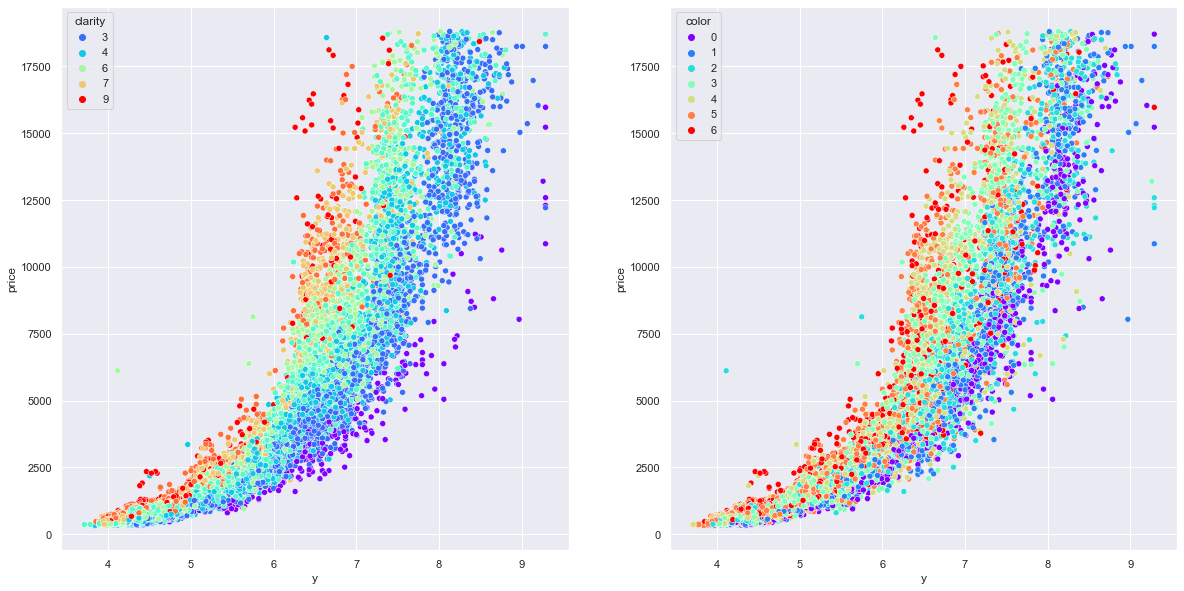

In [1076]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set(font_scale=1)

sns.scatterplot(x=X_train_bkp['y'],y=X_train_bkp['price'],hue=X_train_bkp['clarity'],palette='rainbow')
plt.subplot(1,2,2)
sns.scatterplot(x=X_train_bkp['y'],y=X_train_bkp['price'],hue=X_train_bkp['color'],palette='rainbow')

In [1077]:
X_test_bkp.rename(columns = {"predicted_DecisionTreeRegressor(random_state=1)": "predicted_DT", "predicted_RandomForestRegressor(random_state=1)": "predicted_RF", 
                     "predicted_MLPRegressor(hidden_layer_sizes=500, max_iter=10000, random_state=1)": "predicted_ANN"}, 
                      inplace = True) 

In [1078]:
X_test_bkp

carat  cut  color  clarity  depth  table     x     y     z    price  \
16998   1.26    3      1        4  60.50   62.0  6.97  6.92  4.20   5292.0   
24458   0.90    2      3        5  58.75   59.0  6.35  6.36  3.72   4484.0   
16613   1.37    4      4        6  59.60   57.0  7.28  7.22  4.32  11649.0   
309     0.84    1      3        6  63.60   57.0  5.98  5.93  3.79   3316.0   
26653   2.00    2      0        5  60.80   62.0  8.09  8.12  4.93  13043.0   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...      ...   
25017   0.34    4      5        6  61.20   57.0  4.51  4.45  2.74   1033.0   
8486    1.01    2      5        5  62.20   58.0  6.36  6.41  3.97   6522.0   
26892   1.01    3      1        5  62.50   58.0  6.39  6.44  4.01   4592.0   
17456   1.01    1      2        4  60.30   63.5  6.53  6.50  3.93   4642.0   
26170   1.02    3      2        4  61.90   61.0  6.42  6.34  3.95   4558.0   

       predicted_LR  predicted_LR_PCA  predicted_DT  predicted_RF  \
16998   5655.406315       5446.519432        6166.0   6001.411602   
24458   3960.733971       3429.569554        4475.0   4648.425540   
16613  11480.756377      11317.690586       15803.0  13923.257305   
309     3666.489244       3166.224387        4496.0   3386.811862   
26653  13605.326693      19866.883532       13543.0  13558.767087   
...             ...               ...           ...           ...   
25017    854.849313        949.660002        1003.0   1021.130488   
8486    5421.041915       5016.737633        6844.0   6607.260193   
26892   4300.253071       3747.869183        4198.0   4581.092889   
17456   4131.176565       3587.454370        4243.0   4539.891921   
26170   3920.054410       3575.322659        4450.0   4586.538873   

       predicted_ANN  
16998    5679.114708  
24458    4805.525487  
16613   13124.394335  
309      3655.753411  
26653   13670.299963  
...              ...  
25017     913.587895  
8486     6446.030803  
26892    4405.552144  
17456    4575.029524  
26170    4449.639084  

[8080 rows x 15 columns]

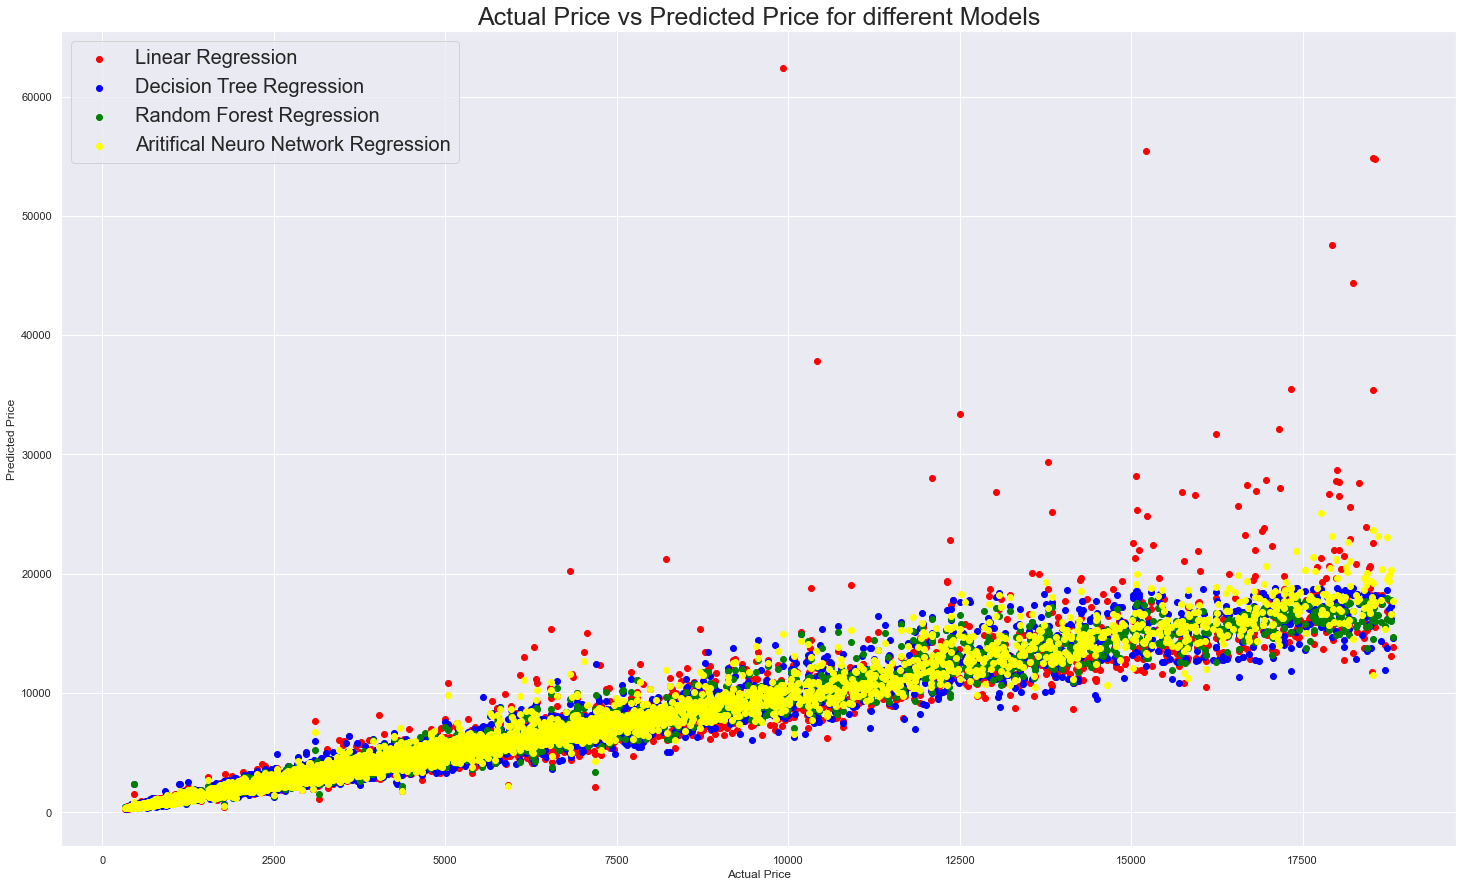

In [1079]:
fig, ax = plt.subplots(1,1, sharey=False,figsize= (25,15))

ax.scatter(X_test_bkp['price'], X_test_bkp['predicted_LR'], color='Red',label='Linear Regression')
ax.scatter(X_test_bkp['price'], X_test_bkp['predicted_DT'], color='Blue',label='Decision Tree Regression')
ax.scatter(X_test_bkp['price'], X_test_bkp['predicted_RF'], color='Green',label='Random Forest Regression')
ax.scatter(X_test_bkp['price'], X_test_bkp['predicted_ANN'], color='Yellow',label='Aritifical Neuro Network Regression')
ax.set(xlabel = "Actual Price",ylabel="Predicted Price")
ax.set_title("Actual Price vs Predicted Price for different Models",fontsize=25);

ax.legend(fontsize=20)
plt.show()

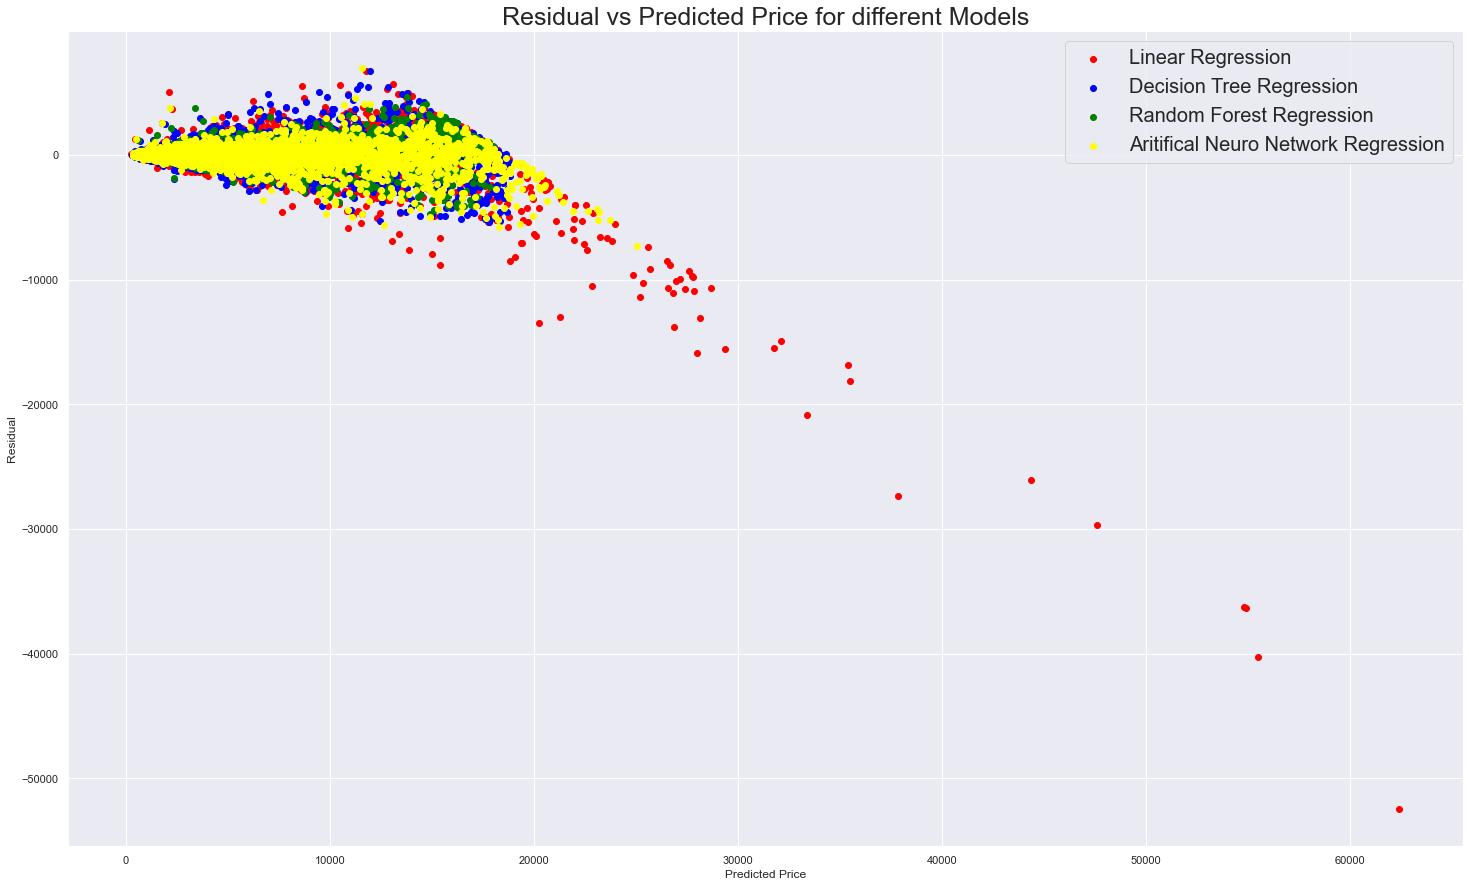

In [1080]:
fig, ax = plt.subplots(1,1, sharey=False,figsize= (25,15))

ax.scatter( X_test_bkp['predicted_LR'], X_test_bkp['price']-X_test_bkp['predicted_LR'],color='Red',label='Linear Regression')
ax.scatter( X_test_bkp['predicted_DT'], X_test_bkp['price']-X_test_bkp['predicted_DT'], color='Blue',label='Decision Tree Regression')
ax.scatter( X_test_bkp['predicted_RF'], X_test_bkp['price']-X_test_bkp['predicted_RF'],color='Green',label='Random Forest Regression')
ax.scatter( X_test_bkp['predicted_ANN'],X_test_bkp['price']-X_test_bkp['predicted_ANN'], color='Yellow',label='Aritifical Neuro Network Regression')
ax.set(xlabel = "Predicted Price",ylabel="Residual")
ax.set_title("Residual vs Predicted Price for different Models",fontsize=25);

ax.legend(fontsize=20)
plt.show()

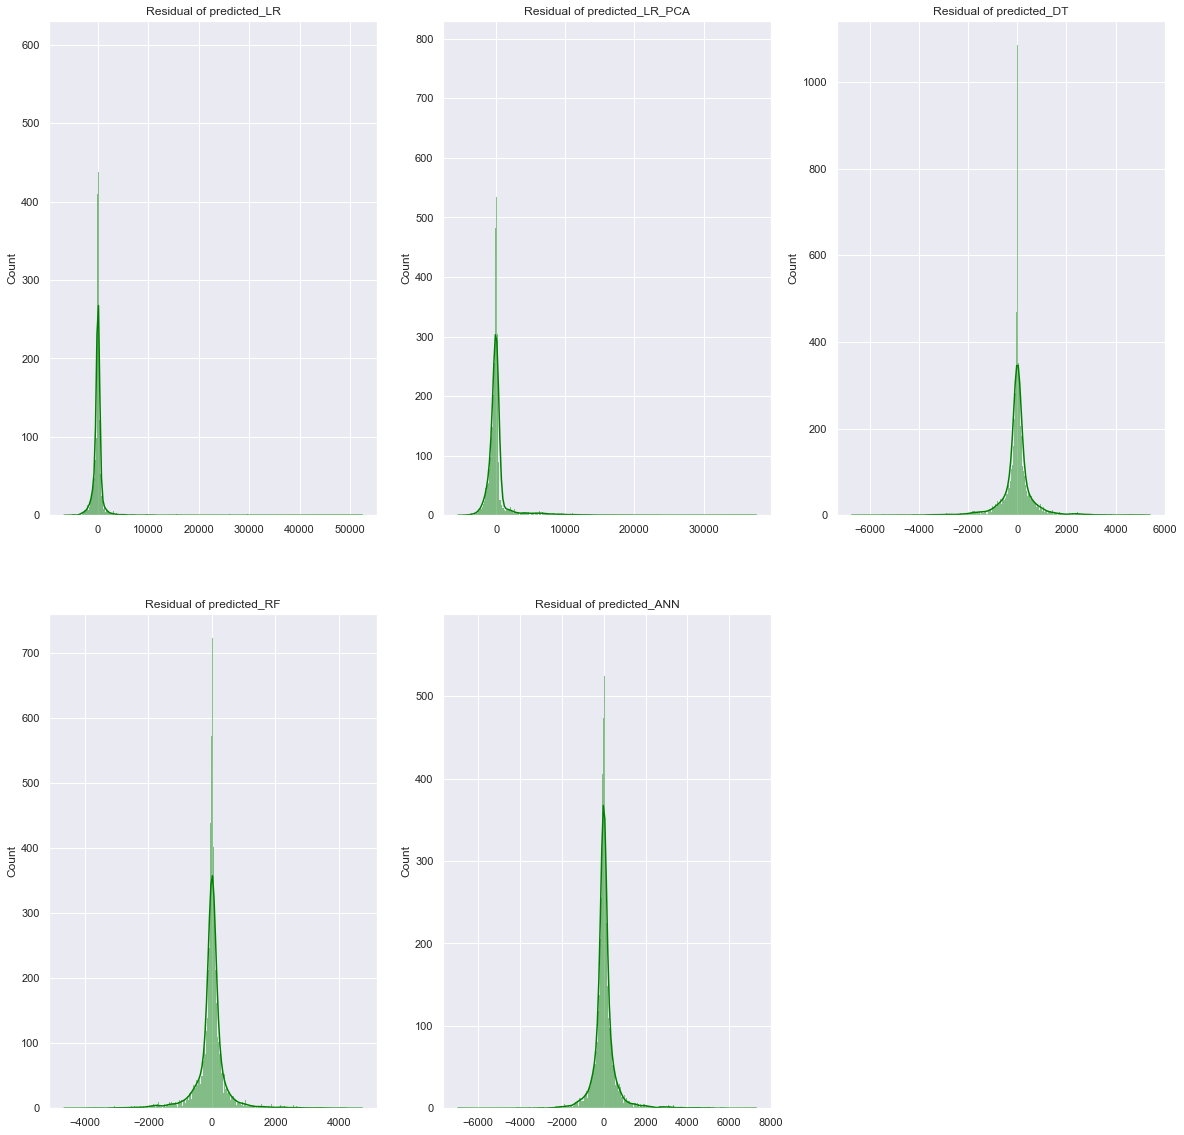

In [1081]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=2

for col in X_test_bkp.columns[10:] :
        distplot_title = "Residual of " + col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(X_test_bkp[col]-X_test_bkp["price"] ,color='green',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 

## K-Mean clustering for differtiating high and low price cubic zirconia 

In [1082]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
ss=StandardScaler() 
scaled_df1 = ss.fit_transform(df1.drop(['log_price'], axis=1))


In [1083]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)


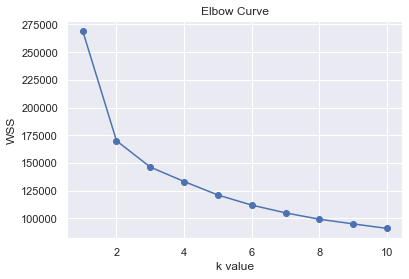

In [1084]:
sns.set(font_scale=1)
plt.plot(range(1,11), wss, 'o-');
plt.title('Elbow Curve')
plt.xlabel('k value')
plt.ylabel('WSS')
plt.show;


In [1085]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
df1_bkp1["Clus_kmeans"] = labels
df1_bkp1.head()

carat        cut color clarity  depth  table     x     y     z   price  \
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0   
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0   
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0   
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0   
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0   

   log_price  Clus_kmeans  
1   6.214608            0  
2   6.892642            0  
3   8.746716            1  
4   6.987490            0  
5   6.659294            0

In [1086]:
df1_bkp1.Clus_kmeans.value_counts().sort_index()

0    15686
1    11247
Name: Clus_kmeans, dtype: int64

In [1087]:
clust_profile=df1_bkp1.drop(['log_price'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df1_bkp1.Clus_kmeans.value_counts().sort_index()
clust_profile

carat      depth      table         x         y         z  \
Clus_kmeans                                                                 
0            0.465507  61.697584  57.048929  4.917741  4.926710  3.035887   
1            1.250753  61.812541  57.974749  6.861889  6.854011  4.237378   

                   price   freq  
Clus_kmeans                      
0            1385.492860  15686  
1            7496.803592  11247

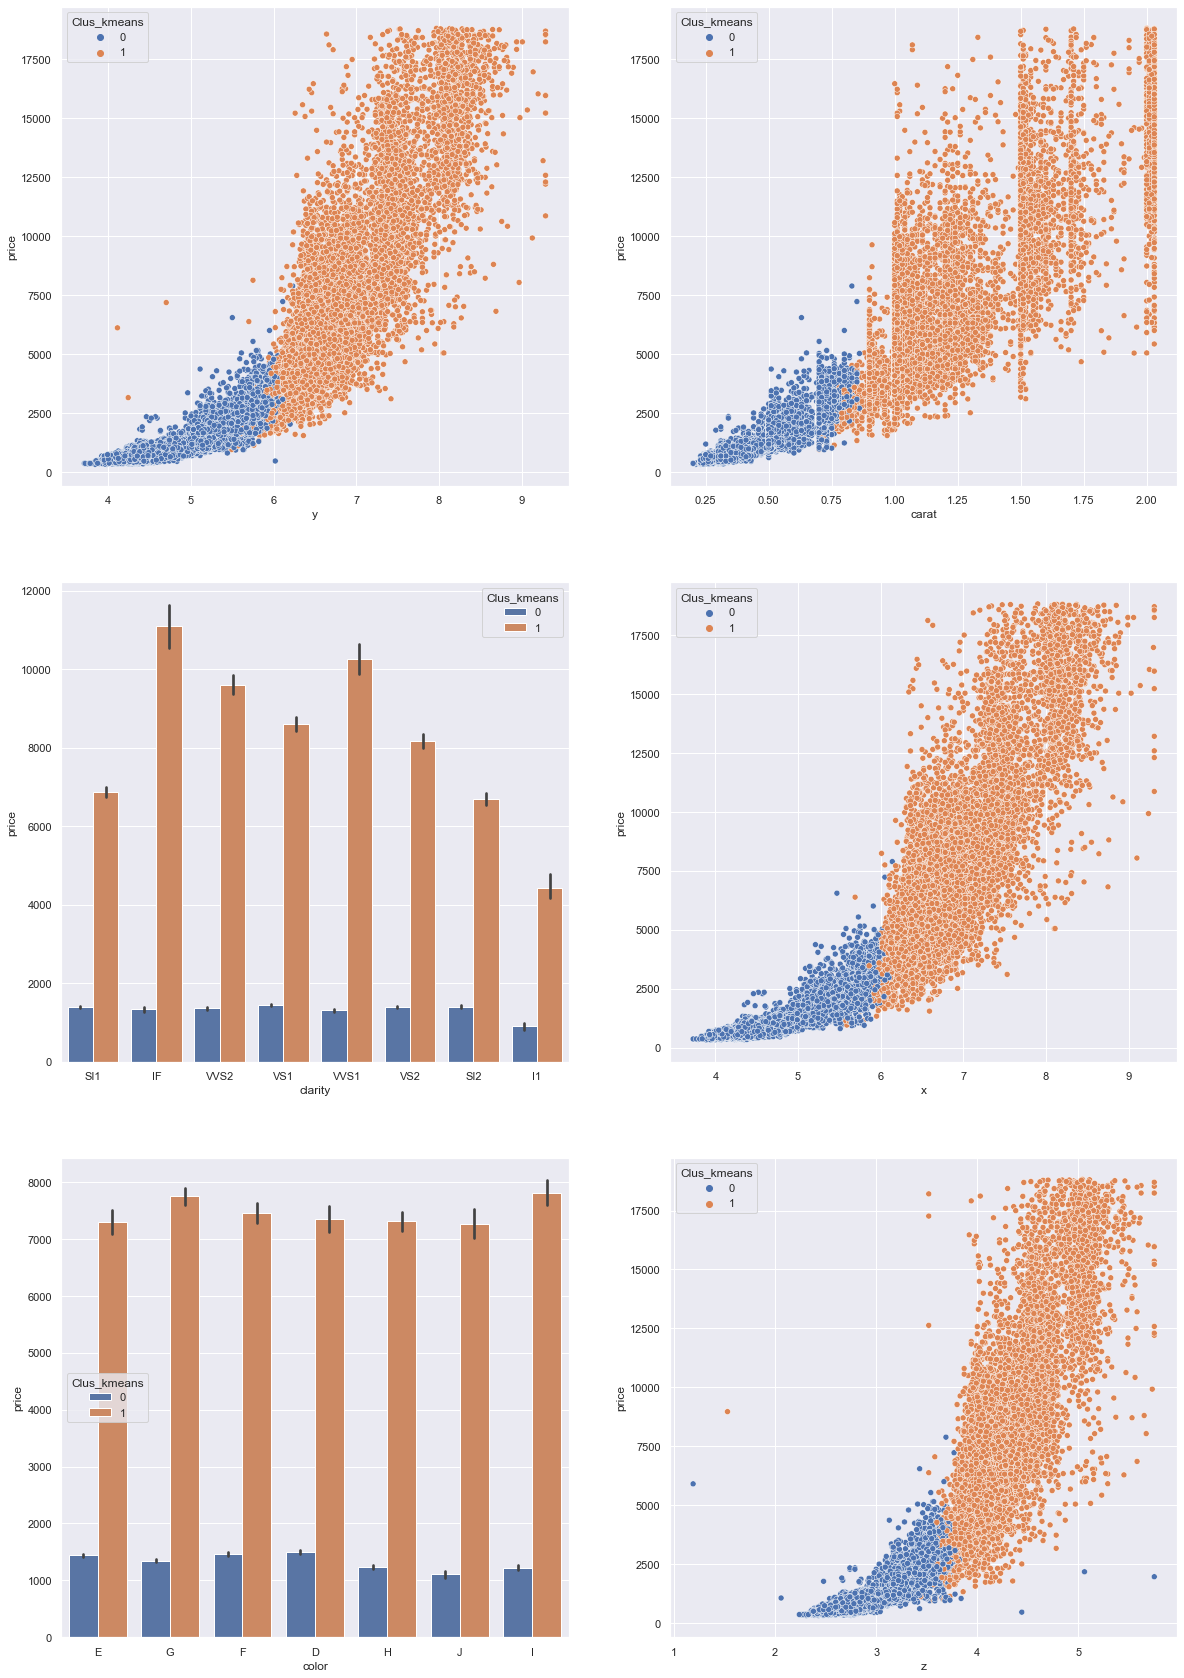

In [1088]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
sns.set(font_scale=1)

sns.scatterplot(x=df1_bkp1['y'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])
plt.subplot(3,2,2)
sns.scatterplot(x=df1_bkp1['carat'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])
plt.subplot(3,2,3)
sns.barplot(x=df1_bkp1['clarity'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])
plt.subplot(3,2,4)
sns.scatterplot(x=df1_bkp1['x'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])
plt.subplot(3,2,5)
sns.barplot(x=df1_bkp1['color'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])
plt.subplot(3,2,6)
sns.scatterplot(x=df1_bkp1['z'],y=df1_bkp1['price'],hue=df1_bkp1['Clus_kmeans'])


 # Conclusion

The final Linear Regression equation is  
  
<b>log price = b0 + b1 * carat + b2 * cut  + b3 * color + b4 * clarity + b5 * depth + b6 * table + b7 * x + b8 * y + b9 * z   </b>
  
<b>log price = (-3.99) + (-0.98) * carat + (0.02) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.75) * x + (0.47) * y + (0.19) * z  </b>  
  
When carat increases by 1 unit, log_price decreases by 0.98 units, keeping all other predictors constant.  This is absurd as we have seen in the analysis that price increases with the carat. 

Coefficient of x,y, and z is positive which means log price increases with the increase in x,y,z value. These are correlated with each other and carat. Due to high multicollinearity in the data set , as the value of carat will increase, value of x,y and z will increase. Overall effect results in increasing the price. Due to high multicollinearity these coefficients are not stable and there could be multiple coefffcient values which will give the same predicted value but the coefficients value would be different. Hence we should not rely on these coefficients. 

We could perform PCA to reduce multicollinearity in the dataset but it would be difficult to comprehend the coefficients of the new components created out of PCA. 


<b>log_price = (7.78)  + (0.45) * PC1 + (-0.12) * PC2 + (-0.08) * PC3 + (-0.06) * PC4 + (0.36) * PC5 + (-0.03) * PC6  </b> 
We can see that PC1 has the most important coefficient (0.45) for PC1, where PC equation is defined as PC1 : 0.43 * carat + 0.43 *x + 0.43 *y + 0.43*z  - 0.09 * cut - 0.14 *color - 0.19 *clarity + 0.01 * depth + 0.11 * table  

We can see that PC1 is primarily the factor of carat , length, width and height of the zirocnia. So as these will increase , price of zirconia will significantly increase.

If we check the root mean square error of the predicted price, its coming as very high for linear regression model (1600) as compared to the other models. On comparing the results with other regressor models, we can see that Decision Tree, Random Forest and Aritificial Nueral Network are giving good results and have R2 results close to 99%.

Among all these models we should opt for Randorm forest regressor which has around 99% R2 score and Root mean square error is also these least (568) for test dataset

As per random forest, top feature which are helping in predicting the price are :-
 - y (width)
 - carat (weight)
 - clarity
 - x (length)
 - color

As the width increases from 4mm to 9mm, price of cubic zirconia increases from 400 to 19000 approx. which is very steep rise


## Recommendations 

As per the analysis, our recommendation to business is  :-
    
    1) We have predicted the price of cubiz zirconia using multiple regressor models. After comparing several models, we have shortlisted that the Random Forest Regressor is giving the best results.
    R2 score of the the model as 99% and Root Mean square error for the test data set is around 568.
    
    2) Top 5 features which are contributing to the high price of cubic zirconia are :-
        y (width)
        carat (weight)
        clarity
        x (length)
        color
           
    3) Width, length, height and carat weight have a very strong correlation with each other. These are physical dimensions of the cubic zirconia, if we are increasing the one property, then the other has to be increased proportionately. Due to this relationship, it might be difficult to provide the linear equation with stable coefficients for the price prediction. Still we have obtained the linear equation as shown below :-
    
    log price = (-3.99) + (-0.98) * carat + (0.02) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.75) * x + (0.47) * y + (0.19) * z
    
    
    
    4) We have found that  Cut, Depth and Table attributes importance in predicting the price of cubic zirconia is the least as per the given data. So Business can check and analyse these features using some more dataset to understand the impact.
    
    5) Cubic zirconia manufacturer should manufacture zirconia with the following specifications for higher price range and higher profits :-
    
    Length > 6 mm
    Width > 6 mm
    Height > 4 mm
    Carat weight> 0.8
    Clarity better than l1
    
    6) Cubic zirconia manufacturer should check the quantities sold for the following specifications :-
    Length < 6 mm
    Width < 6 mm
    Height < 4 mm
    Carat weight < 0.8
    Clarity l1 or lower
    
    For these specifications, price is low and if selling quantites are not high then these zirconia manufactuing should be discontinued.